In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
global dff



In [105]:
%autosave 20

Autosaving every 20 seconds


In [213]:
def readData():   
    import numpy as np
   
    data = pd.read_csv('WindramTrainingData.csv', index_col = [0])
    metadata = pd.read_csv('WindramMetaData.csv', index_col = [0])
    
    #data = pd.read_csv('selectedGenes_Marques1.csv', index_col = [0])
    df = pd.DataFrame(data)
    
    colsums = df.sum(axis=0)
    #print(colsums)
    normalized = df.div(colsums)
    #print(array, "_", colsums)
    #print(normalized.shape)
    data1 = normalized
    #data1 = np.transpose(normalized)
    return data, data1, metadata

In [230]:
from collections import Counter

data, data1, metadata = readData()
actual_capture_time = metadata['obstime'].values


unique = set(actual_capture_time)
#print(actual_capture_time)
count_array = Counter(actual_capture_time) 
unique = list(unique)

unique = sorted(unique, reverse=False)
print(unique)

print(count_array)

[6, 18, 30, 42]
Counter({6: 6, 18: 6, 30: 6, 42: 6})


In [231]:
def initialize(data, ntest, unique, count_array):
    from numpy.random import seed
    from numpy.random import normal
    from scipy.stats import poisson
    #make this example reproducible
    seed(1)
    
    n = data.shape[1]
    array1 = np.arange(1, n+1, 1)
    array2 = np.arange(1, (2*ntest)+1, 1)
    dfIni = pd.DataFrame(columns = array1, index = array2)
    
    array1 = np.arange(1, 101, 1)
    array2 = np.arange(1, (len(unique)+1), 1)
    normDist = pd.DataFrame(columns = array1, index = array2)
    
    for k in range(1, len(unique)+1):
        
        unique_converted = (unique-np.min(unique))/(np.max(unique)-np.min(unique))
        normDist.loc[k] =  normal(loc=unique[k-1], scale=1.5, size=100)
    
    for i in range(1, (2*ntest)+1):
        arr1 = []
        arr = []
        for j in range(len(unique)):   
            arr = np.array(random.sample(list(normDist.loc[j+1]), count_array[unique[j]]))
            if j == 0 : 
                arr1 = arr
            else:
                arr1 = np.concatenate((arr1, arr))
                
        dfIni.loc[i] = arr1
                
    return dfIni

In [233]:
import random 
dataTransposed = np.transpose(data)
Individual = initialize(data, ntest, unique, count_array)
print(Individual)

         1        2        3        4        5        6        7        8   \
1   5.71225  4.35016  4.99401  6.87993  5.51637  4.87926   17.569  19.2028   
2   7.31425  5.55286  7.11307  7.79838  4.85819   8.4897  19.8542  15.9403   
3   6.18024  5.88664  6.11601  7.69744  7.24196  6.76939  18.0489  19.6666   
4   7.39665  6.56635  6.61508  7.69744  4.28622  9.15038  17.7201  18.4727   
5   6.27984  5.81566   2.9667  4.96251  5.55286  6.47856  17.7286  17.6605   
6    4.8684   6.0654  5.59817  6.79553  9.27836   5.2433  20.4415  18.0261   
7   5.62594  5.69886  5.88664  5.59817  4.39055  5.40487  17.6007   18.662   
8   5.47163  6.47856  7.39665  4.66856  7.79838  6.42838  18.4727  17.7953   
9   4.85819     5.07  7.79838  4.59635  7.04705  7.32771  17.0296   17.555   
10  5.62594  7.69423  5.42392  6.61508  7.39665  4.68321  16.2835   19.295   
11  7.14302  8.61722  4.96251  7.70065  6.75374  5.20774  18.7809  19.9106   
12  5.20774  4.87926  6.34514  9.27836   7.8793  5.47163  18.754

In [78]:
def sqrsum_sumsqr(ntest, data_ranked):
    print(data_ranked.shape)
    squared = np.square(data_ranked)
    sumsqr = squared.sum(axis = 0)
    print(squared, "_", sumsqr)
    colMeans = np.mean(data_ranked, axis = 0)
    sqrsum = np.square(colMeans)
#     print(sqrsum)
#     print(sumsqr)
    #sumsqr_df = pd.DataFrame(sumsqr)
    sqrsum_df = pd.DataFrame(sqrsum)
    
    cellNumber = len(data_ranked)
    sqrsum_df *=cellNumber
    #print(sqrsum_df)
    
    ntest = ntest
    #print(ntest)
    
    sumsqr_new = pd.DataFrame()
    sqrsum_new = pd.DataFrame()
    
    for i in range(int(8*ntest)):
        sumsqr_new = pd.concat([sumsqr_new,sumsqr], axis = 1)
    print(sumsqr_new)
    
    for i in range(int(8*ntest)):
        sqrsum_new = pd.concat([sqrsum_new,sqrsum_df], axis = 1)
    print(sqrsum_new)
    return sumsqr_new, sqrsum_new, sumsqr, sqrsum

In [234]:
ntest = 10
sumsqr_new, sqrsum_new, sumsqr, sqrsum = sqrsum_sumsqr(ntest,dataTransposed ) #data4 data_ranked

(24, 100)
           CATMA1a00350  CATMA1a00725  CATMA1a00790  CATMA1a05095  \
GSM734540     93.074987    144.599117     46.087864     61.338558   
GSM734541     96.285282    154.566696     42.723733     65.365719   
GSM734542     97.700641    164.041429     30.953746     55.375600   
GSM734543     99.762601    167.652461     29.196472     61.718137   
GSM734544     98.089084    163.211719     32.040777     62.347058   
GSM734545    104.075190    166.467645     51.052241     57.745822   
GSM734546     99.842955    172.351644     29.656788     63.847663   
GSM734547    104.567851    164.635357     43.821327     64.813845   
GSM734548     97.706349    177.789025     41.562152     56.444076   
GSM734549     84.750315    164.535748     33.763620     62.494693   
GSM734550     69.916320    178.155701     27.612768     58.631085   
GSM734551     73.142802    164.611096     45.923206     72.800304   
GSM734552     64.963542    189.777589     34.317278     62.360385   
GSM734553     64.373479 

In [1229]:
print(sqrsum_new.iloc[1])

0    186322.5
0    186322.5
0    186322.5
0    186322.5
0    186322.5
       ...   
0    186322.5
0    186322.5
0    186322.5
0    186322.5
0    186322.5
Name: RPS11, Length: 400, dtype: float64


In [220]:
def initialize_old(data, ntest):
    import random
    n = data.shape[0]
    array1 = np.arange(1, n+1, 1)
    array2 = np.arange(1, (2*ntest)+1, 1)
    dfIni = pd.DataFrame(columns = array1, index = array2)
    #print(array1)
    
    
    for i in range(1, (2*ntest)+1):
        dfIni.loc[i] = np.random.random(n)
        #print(random.sample(range(1, n+1),n))
        #dfIni.loc[i] = random.sample(range(1, n+1),n)
        #print(dfIni)
    return dfIni

In [235]:
mininit = 30
costmat = pd.DataFrame(0, index=np.arange(mininit), columns=np.arange(8*ntest))
#print(costmat)

In [237]:
def crossover(p1, p2):
    print(p1,p2)
    print("p1p2")
    import math
    from numpy import nan
    from scipy import stats
    
    u = np.random.poisson(1, 1)
    if u == 0:
        u = 1
        p2 = p2.iloc[::-1]
#     corr = stats.pearsonr(p1, p2)
#     if corr < 0:
#         p2 = p2.iloc[::-1]
        
    c1, c2 = p1.copy(), p2.copy()
    c11 = pd.DataFrame()
    c22 = pd.DataFrame()
    length = len(p1)
    #print(length)
    
    #pt = random.randint(1,  int(length/2))
    pt = int(length/2)
    #print(pt)
    
#     print(c1, "c1c2")
#     print(type(c1))
#     print(c1[1])
#     print(c1[1:3])
    if u%2 == 1:
        c1[0:pt] = p1.iloc[0:pt]
        c2[(pt):length] = p2.iloc[(pt):length]
        c1[pt: length] = p2.iloc[0:pt]
        c2[0:pt] = p1.iloc[pt:length]
        
        c11 = p1.iloc[0:pt]
        c22 = p2.iloc[(pt):length]
    else:
        c2[0:pt] = p2.iloc[0:pt]  
        c1[(pt):length] = p1.iloc[(pt):length]
        c2[pt: length] = p1.iloc[0:pt]
        c1[0:pt] = p2.iloc[pt:length]
        
        c22 = p2.iloc[0:pt] 
        c11 = p1.iloc[(pt):length]
        
    

    df = pd.DataFrame()
    df = df.append(c1)
    df = df.append(c2)
    #print(df)
    return df


In [236]:
def recombination(X1):
    test = X1.isnull().values.any()
    #print(test)
    
    N = X1.shape[0]
    n = X1.shape[1]
    #print(N)
    samp = random.sample(range(1,N+1),int(N/2))
    samp = set(samp)
    all = np.arange(1,N+1)
    all = set(all)
    #print(X1.loc[samp,])
    X2 = X1.loc[samp,]
    #print("X2")
    #print(X2)
    X3 = X1.loc[all.difference(samp),]
    #print(X3)
    C1 = pd.DataFrame()
    O_samp =all.difference(samp)
    
    #print(O_samp, samp)
    check = X2.isnull().values.any()
    check1 = X3.isnull().values.any()
    #print(check, check1, "before Crossover")
    for i, j in zip(samp,O_samp):
        #print(X2.loc[i], X3.loc[j])
        
        print(">>>>>>>")
        
        check = X2.loc[i].isnull().values.any()
        check1 = X3.loc[j].isnull().values.any()
        #print(check, check1)
#         if check:
#             C11 = crossover(X2.loc[i+1], X3.loc[j])
#         if check1:
#             C11 = crossover(X2.loc[i], X3.loc[j+1])
        
        C11 = crossover(X2.loc[i], X3.loc[j])
#         print(X2.loc[i])
#         print(X3.loc[j])
#         print(i,j)
        print("<<<<<<")
        #C11 = crossover(X2.loc[i], X3.loc[j])
        
        l = list(samp)
        if i== l[0]:
            C1 = C11
            #C1.append(C22)
        else:
            C1 = C1.append(C11)
            #C1.append(C22)
        
    return C1.sort_index(axis = 0)
    #X<-t(apply(cbind(X2,X3),1,"recomb"))
    #return(rbind(X[,(1:N)],X[,((N+1):(2*N))]))


In [238]:
# test = list(Individual.loc[1])
# print(test)
# print(list(c1.loc[1]))
# print(list(c1.loc[2]))
c1 = recombination(Individual)
# test1 = np.unique(list(c1.loc[1])).size == len(list(c1.loc[1]))
# test2 = np.unique(list(c1.loc[2])).size == len(list(c1.loc[2]))
# print(test1, test2)

>>>>>>>
1     6.18024
2     5.88664
3     6.11601
4     7.69744
5     7.24196
6     6.76939
7     18.0489
8     19.6666
9     16.5694
10     18.507
11    17.5203
12    18.7548
13    29.7201
14    30.6443
15    28.8271
16    31.6716
17    32.9341
18    27.9051
19     41.008
20    39.7933
21     43.789
22    42.7726
23     42.927
24     40.236
Name: 3, dtype: object 1     5.71225
2     4.35016
3     4.99401
4     6.87993
5     5.51637
6     4.87926
7      17.569
8     19.2028
9     17.6007
10    19.6821
11    18.2066
12    17.8474
13     31.236
14    32.6882
15     30.935
16    28.3213
17    30.3167
18    29.1202
19    44.0832
20    43.3809
21    40.5045
22     41.008
23    41.0729
24    42.0328
Name: 1, dtype: object
p1p2
<<<<<<
>>>>>>>
1     7.39665
2     6.56635
3     6.61508
4     7.69744
5     4.28622
6     9.15038
7     17.7201
8     18.4727
9      19.295
10    18.7548
11    19.4795
12    18.7428
13    29.8732
14    30.1214
15    29.7017
16     28.979
17    30.9915
18    30.3167
19

In [23]:
def mutation(DataForMutation):
    N_rows = DataForMutation.shape[0]
    n_columns = DataForMutation.shape[1]
    
    
    for i in range(N_rows):
        samp = random.sample(range(0, n_columns),2)
        u1 = min(samp)
        u2 = max(samp)
        #print(u1, u2)
        #print(DataForMutation)
        previous = DataForMutation.iloc[i,u1:u2]
        new = previous.iloc[::-1]
        #print(type(new))
        #print(new)
        #print(DataForMutation.iloc[i,u1:u2])
        DataForMutation.iloc[i,u1:u2] = list(new)

    return(DataForMutation)
    

In [239]:
forMutation = pd.DataFrame();
forMutation = pd.concat([c1,Individual], ignore_index=True)
#print(forMutation)
#forMutation = forMutation.concat(Individual)
arrayMM = mutation(forMutation)
#print(arrayMM.shape)

In [240]:
forCost = pd.DataFrame();
forCost = pd.concat([arrayMM,forMutation], ignore_index=True)
# forCost = forCost.append(arrayMM)
# forCost = forCost.append(forMutation)
print(forCost)
index = np.array(range(1,len(forCost)+1));
#print(index)
#forCost.set_index(index)

         1        2        3        4        5        6        7        8   \
0   39.7933   41.008  27.9051  32.9341  31.6716  28.8271  30.6443  29.7201   
1   29.8732  30.1214  29.7017   28.979  30.9915  30.3167  41.3367  43.7329   
2   6.18024  5.88664  7.69744  6.11601  7.24196  6.76939  18.0489  19.6666   
3   7.39665  6.56635  6.61508  7.69744  17.7201  9.15038  4.28622  18.4727   
4   6.27984  5.81566   2.9667  4.96251  5.55286  6.47856  17.7286  17.6605   
..      ...      ...      ...      ...      ...      ...      ...      ...   
75  8.19316  2.90979   5.2433  6.75374  7.39665  6.29745  40.9116  32.9341   
76  4.32403  6.34514  7.39665  6.35162  29.3476  29.1202  30.2658  29.6537   
77  8.53868  9.15038  5.48422  4.99401   8.4897  19.8368  16.0316  16.5045   
78  4.28622  5.81566  6.06332  4.96924  6.35162  6.76939  19.2028  17.0296   
79  5.20774  7.29811  4.32403  5.08237  2.90979  6.17851  17.9631  18.3732   

         9        10  ...       15       16       17       18  

In [121]:
forCost.shape

(80, 24)

In [241]:
max_value = forCost.to_numpy().max()
min_value = forCost.to_numpy().min()
cellCount = dataTransposed.shape[0]
OldRange = (max_value - min_value)  
NewRange = ((cellCount-1) - 0) 
#ord1-min(ord1))/(max(ord1)-min(ord1))

n = forCost.shape[0]
m = forCost.shape[1]
array1 = np.arange(0, n, 1)
array2 = np.arange(1, m+1, 1)
forCost_converted = pd.DataFrame(columns = array2, index = array1)

for i in range(len(forCost)):   
    forCost_converted.loc[i] = (((forCost.loc[i] - min_value) * NewRange) / OldRange) + 0

In [246]:
print(forCost_converted)
print(forCost_converted.astype(int))
forCost_converted = forCost_converted.astype(int)

          1        2          3        4        5        6         7   \
0    20.0563  20.7168    13.5918  16.3265  15.6399  14.0932   15.0813   
1     14.662   14.797    14.5688  14.1758  15.2701  14.9032   20.8955   
2    1.77839  1.61874     2.6034  1.74346  2.35572  2.09875   8.23227   
3    2.43984  1.98834    2.01484   2.6034  8.05349  3.39348  0.748469   
4    1.83255  1.58014  0.0309458  1.11622  1.43723  1.94061    8.0581   
..       ...      ...        ...      ...      ...      ...       ...   
75   2.87296        0     1.2689  2.09024  2.43984  1.84212   20.6644   
76  0.769031  1.86806    2.43984  1.87158  14.3762  14.2526   14.8755   
77   3.06085  3.39348    1.39991  1.13334  3.03421  9.20445   7.13529   
78  0.748469  1.58014    1.71481  1.11988  1.87158  2.09875   8.85972   
79   1.24957  2.38626   0.769031  1.18139        0  1.77745   8.18559   

         8        9        10  ...       15       16        17       18  \
0   14.5788  22.2291  21.6764  ...  15.2394  13.

In [31]:
def order(data):
    for i in range(len(data)):
        d = np.array(data.loc[i])
        sort_index = np.argsort(d)
        listed = list(sort_index)
        data.loc[i] = listed
        #print(data)
    return data

In [247]:
#print(type(data3))
#print(forCost)
orderedData = order(forCost)
transposed = np.transpose(forCost_converted)
# print(forCost.shape)
#print(transposed)
array2 = np.arange(0, 24, 1)
transposed.index = array2
print(transposed)


    0   1   2   3   4   5   6   7   8   9   ...  70  71  72  73  74  75  76  \
0   20  14   1   2   1   1  15   1   1   1  ...   2   1   2   3   1   2   0   
1   20  14   1   1   1   1  15   1   1   2  ...   3   1  20   1   0   0   1   
2   13  14   2   2   0   1  14   8   2   1  ...   1   1  21   0  14   1   2   
3   16  14   1   2   1   2  16   8   0   2  ...   2   3  20   1  14   2   1   
4   15  15   2   8   1   3  14   9   2   2  ...   2   2  22   9  14   2  14   
5   14  14   2   3   1   1  15   9  20   0  ...   1   1  20   9  14   1  14   
6   15  20   8   0   8   9  22   8  21   9  ...   8   8  14   8  16  20  14   
7   14  22   9   8   8   8  22   8  20   8  ...   9   8  14   8  16  16  14   
8   22  19   7   8   8   8  21   1   9   7  ...   6   8  14   8   8  16  15   
9   21  20   8   8   8   7  21   2   9   8  ...   9   8  15   8   8  14   7   
10  21  22   7   9   8   8  20   0   8   7  ...   8   8  14   1   7  16   8   
11  20  21   8   8   8   8  22   2   8   6  ...   8 

In [147]:
int(transposed.values)

TypeError: only size-1 arrays can be converted to Python scalars

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
def linear1(data):
    from sklearn.linear_model import LinearRegression
    
    row = data.shape[0]
    x = np.array(range(1, row+1)).reshape((-1, 1))
    y = np.square(x)
   
    
    model = LinearRegression().fit(x, y)
    r_sq = model.score(x, y)
    
    print(f"coefficient of determination: {r_sq}")
    print(f"intercept: {model.intercept_}")
    print(f"slope: {model.coef_}")
    
    y_pred = model.predict(x)
    absError = y_pred - y
    absError *= -1
    #print(absError)
    
    SE = np.square(absError) # squared errors
    SumSE = sum(SE)
    RSum_SE = np.sqrt(SumSE)
    basis1 = absError/ RSum_SE
    
    print(basis1)
    
    
    MSE = np.mean(SE) # mean squared errors
    RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
    Rsquared = 1.0 - (np.var(absError) / np.var(y))
    print('RMSE:', RMSE)
    print('R-squared:', Rsquared)

    return basis1

In [127]:
#print(data_ranked.shape[1])
basis1 = linear1(dataTransposed)

coefficient of determination: 0.9424952246908616
intercept: [-108.33333333]
slope: [[25.]]
[[ 0.40271514]
 [ 0.29765902]
 [ 0.20215345]
 [ 0.11619844]
 [ 0.03979399]
 [-0.02705991]
 [-0.08436325]
 [-0.13211604]
 [-0.17031826]
 [-0.19896993]
 [-0.21807105]
 [-0.2276216 ]
 [-0.2276216 ]
 [-0.21807105]
 [-0.19896993]
 [-0.17031826]
 [-0.13211604]
 [-0.08436325]
 [-0.02705991]
 [ 0.03979399]
 [ 0.11619844]
 [ 0.20215345]
 [ 0.29765902]
 [ 0.40271514]]
RMSE: 42.746019957678186
R-squared: 0.9424952246908616


In [35]:
def linear2(data):
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    
    row = data.shape[0]
    #print(row)
    x = np.array(range(1, row+1)).reshape((-1, 1))
    y = np.power(x,3)
    
    transformer = PolynomialFeatures(degree=2, include_bias=False)
    transformer.fit(x)
    x_ = transformer.transform(x)
    x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)
    #print(x_)
    
    model = LinearRegression().fit(x_, y)
    r_sq = model.score(x_, y)
    
    print(f"coefficient of determination: {r_sq}")
    print(f"intercept: {model.intercept_}")
    print(f"slope: {model.coef_}")
    
    y_pred = model.predict(x_)
    absError = y_pred - y
    absError *= -1
    
    SE = np.square(absError) # squared errors
    SumSE = sum(SE)
    RSum_SE = np.sqrt(SumSE)
    basis2 = absError/ RSum_SE
    
    #print(basis1)
    
    MSE = np.mean(SE) # mean squared errors
    RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
    Rsquared = 1.0 - (np.var(absError) / np.var(y))
    print('RMSE:', RMSE)
    print('R-squared:', Rsquared)

    return basis2

In [36]:
def linear11(cellNumber):
    x = np.array(range(1,cellNumber+1))
    mean = np.mean(x)
    #x1<-1:n
    basis11 = (x-np.mean(x))/np.sqrt(np.sum(np.square(x-np.mean(x))))
    #expls11<-apply(t(XX),1,"perm",data=t(t(basis1)))
    return basis11
    

In [131]:
print(len(dataTransposed))
#np.
basis11 = linear11(len(dataTransposed))
print(basis11)

24
[-0.3391165  -0.30962811 -0.28013972 -0.25065133 -0.22116293 -0.19167454
 -0.16218615 -0.13269776 -0.10320937 -0.07372098 -0.04423259 -0.0147442
  0.0147442   0.04423259  0.07372098  0.10320937  0.13269776  0.16218615
  0.19167454  0.22116293  0.25065133  0.28013972  0.30962811  0.3391165 ]


In [132]:
basis2 = linear2(dataTransposed)
print(basis2)

coefficient of determination: 0.9961689883081876
intercept: [877.5]
slope: [[-382.7   37.5]]
RMSE: 258.0741172609139
R-squared: 0.9961689883081876
[[-0.4202326 ]
 [-0.20098081]
 [-0.03155897]
 [ 0.09277863]
 [ 0.17677769]
 [ 0.22518393]
 [ 0.24274306]
 [ 0.23420078]
 [ 0.20430281]
 [ 0.15779485]
 [ 0.09942262]
 [ 0.03393183]
 [-0.03393183]
 [-0.09942262]
 [-0.15779485]
 [-0.20430281]
 [-0.23420078]
 [-0.24274306]
 [-0.22518393]
 [-0.17677769]
 [-0.09277863]
 [ 0.03155897]
 [ 0.20098081]
 [ 0.4202326 ]]


In [933]:
# def expls(basis, data):
#     #print(data)

#     print(type(basis))
#    # print(basis.shape)
#     basis1DF = pd.DataFrame(basis)
#     print(basis1DF)
#     expls1 = perm_on_index(data, basis1DF)
#     #expls2 = perm_on_index(orderedData, basis1)
#     #expls3 = perm_on_index(orderedData, basis21)

In [1398]:
# expls1 = expls(basis11, orderedData)
# print(expls1)
# expls2 = expls(basis11, orderedData)
# expls3 = expls(basis2, orderedData)

In [921]:
arr = np.arange(5)
print(arr)
x = np.zeros((3,4))
print(x)
x[0][1] = 3
print(x)
arr[0] = 5
print(arr)

[0 1 2 3 4]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 3. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[5 1 2 3 4]


In [39]:
def permutation(basisDF, data):
    df3 = pd.DataFrame()
    x = np.zeros((data.shape[0],data.shape[1]))
    for i in range(len(data)):

        data4 = data

        row = data4.iloc[i]
        #print(row)
        #d = row.copy()
        

        j = 0
        for k in range(len(row)):
            index = row.iloc[j]
            #print(basisDF._get_value(index, 0))
            
            x[i][k] = basisDF._get_value(index, 0)
            j = j+1

        #print(x)
#         row = d
#         print(row)
#         df2 = pd.DataFrame(row)
        #print(row)
#         if i == 0:
#             df3 = row
#             #print(df3, "--", i)
#         else:
#             df3 = pd.concat([df3, df2], axis=1)
#             #df3.append(df2, ignore_index = True)

        #print(df3)
    df3 = pd.DataFrame(x)
    df3 = np.transpose(df3)
    return df3


In [248]:
basis11DF = pd.DataFrame(basis11)
#print(basis11DF)
#print(trasposed)
expls1 = permutation(basis11DF, transposed)
print(expls1)
# print(trasposed.iloc[1])
# print(expls1.loc[1])
basis1DF = pd.DataFrame(basis1)
expls2 = permutation(basis1DF, transposed)
print(expls2)
basis2DF = pd.DataFrame(basis2)
expls3 = permutation(basis2DF, transposed)

          0         1         2         3         4         5         6   \
0   0.250651  0.250651  0.044233  0.132698  0.103209  0.073721  0.103209   
1   0.073721  0.073721  0.073721  0.073721  0.103209  0.073721  0.250651   
2  -0.309628 -0.309628 -0.280140 -0.309628 -0.280140 -0.280140 -0.103209   
3  -0.280140 -0.309628 -0.280140 -0.280140 -0.103209 -0.250651 -0.339116   
4  -0.309628 -0.309628 -0.339116 -0.309628 -0.309628 -0.309628 -0.103209   
..       ...       ...       ...       ...       ...       ...       ...   
75 -0.280140 -0.339116 -0.309628 -0.280140 -0.280140 -0.309628  0.250651   
76 -0.339116 -0.309628 -0.280140 -0.309628  0.073721  0.073721  0.073721   
77 -0.250651 -0.250651 -0.309628 -0.309628 -0.250651 -0.073721 -0.132698   
78 -0.339116 -0.309628 -0.309628 -0.309628 -0.309628 -0.280140 -0.103209   
79 -0.309628 -0.280140 -0.339116 -0.309628 -0.339116 -0.309628 -0.103209   

          7         8         9   ...        14        15        16        17  \
0   0.

In [249]:
forBeta = pd.concat([expls1,expls2,expls3], axis = 0)
print(forBeta)

          0         1         2         3         4         5         6   \
0   0.250651  0.250651  0.044233  0.132698  0.103209  0.073721  0.103209   
1   0.073721  0.073721  0.073721  0.073721  0.103209  0.073721  0.250651   
2  -0.309628 -0.309628 -0.280140 -0.309628 -0.280140 -0.280140 -0.103209   
3  -0.280140 -0.309628 -0.280140 -0.280140 -0.103209 -0.250651 -0.339116   
4  -0.309628 -0.309628 -0.339116 -0.309628 -0.309628 -0.309628 -0.103209   
..       ...       ...       ...       ...       ...       ...       ...   
75 -0.031559 -0.420233 -0.200981 -0.031559 -0.031559 -0.200981 -0.092779   
76 -0.420233 -0.200981 -0.031559 -0.200981 -0.157795 -0.157795 -0.157795   
77  0.092779  0.092779 -0.200981 -0.200981  0.092779  0.157795  0.234201   
78 -0.420233 -0.200981 -0.200981 -0.200981 -0.200981 -0.031559  0.204303   
79 -0.200981 -0.031559 -0.420233 -0.200981 -0.420233 -0.200981  0.204303   

          7         8         9   ...        14        15        16        17  \
0   0.

In [250]:
print(forBeta.shape)
forBeta_transpose = np.transpose(forBeta)

beta1 = np.dot(data,forBeta_transpose)  #data_ranked_transpose
print(beta1.shape)
print(beta1)

#print(sumsqr_new.shape)

(240, 24)
(100, 240)
[[ 38.64120936  37.33922043 -44.57464364 ...  -1.01513416 -11.51361718
   -6.85028495]
 [ 58.15190617  56.42495298 -66.59868663 ...  -5.33178539 -17.90256312
   -8.91161652]
 [ 26.93119109  26.15423882 -30.64777828 ...  -1.47430993  -8.22653748
   -4.09195751]
 ...
 [ 43.01141132  41.02340909 -48.86425429 ...  -4.31297221 -14.16349137
   -7.11602593]
 [ 57.32300959  55.43655668 -64.813017   ...  -5.55951308 -17.23489147
   -8.20481002]
 [ 41.47699005  40.16031902 -47.80434761 ...  -2.61489448 -12.64380041
   -7.24490776]]


In [251]:
 print(sumsqr_new.shape)
# print(sqrsum_new)

resid1 = sumsqr_new - sqrsum_new - np.square(beta1[:,0:80])
print(resid1.shape)
resid2 = resid1 - np.square(beta1[:,80:160])
print(resid1.shape)
resid3 = resid2 - np.square(beta1[:,160:240])
print(resid1)

(100, 80)
(100, 80)
(100, 80)
                        0            0            0            0            0  \
CATMA1a00350 -1478.386587 -1379.460908 -1972.142382 -1778.363438 -2082.314111   
CATMA1a00725 -3368.032205 -3170.163332 -4421.773074 -3955.943360 -4630.809953   
CATMA1a00790  -717.389532  -676.144687  -931.386792  -831.189461  -977.837702   
CATMA1a05095 -1216.884543 -1153.583286 -1541.425391 -1386.130320 -1614.224072   
CATMA1a05200 -1836.811778 -1732.599450 -2344.842189 -2090.320723 -2440.031129   
...                   ...          ...          ...          ...          ...   
CATMA5a56920  -849.855509  -817.775411 -1152.014167 -1037.417642 -1208.093386   
CATMA5a59560 -2128.692019 -2047.163986 -2818.484988 -2536.564863 -2961.498500   
CATMA5a60200 -1839.403196 -1672.341785 -2377.137039 -2117.441622 -2484.639165   
CATMA5c64429 -3262.439324 -3049.723712 -4177.239068 -3741.971795 -4361.480461   
CATMA5c65156 -1717.403594 -1609.914114 -2282.318541 -2054.156396 -2398.279778  

In [164]:
import math
def findBIC(res, k, n):   
      w = np.ones(n)
      ll = 0.5 * (np.sum(np.log(w)) - n * (np.log(2 * math.pi) + 1 - np.log(n) + np.log(res)))
      print(ll)
      val = (k+2)*np.log(n)-2*ll
      return(val)

In [252]:
cellsCount = dataTransposed.shape[0]

bic1= findBIC(resid1,1,cellsCount)
# print(bic1.loc[2])
bic2 = findBIC(resid2,2,cellsCount)
# print(bic2.loc[2])
bic3 = findBIC(resid3,3,cellsCount)
print(bic3)
bic1_a = np.array(bic1)
bic2_a = np.array(bic2)
bic3_a = np.array(bic3)
#minBic = np.array()
minBic = np.minimum(bic1_a,bic2_a)
#print(minBic[0])
minBic = np.minimum(bic3_a, minBic)
bicMIN = pd.DataFrame(minBic)
print(bicMIN)

               0   0   0   0   0          0   0          0          0   0  \
CATMA1a00350 NaN NaN NaN NaN NaN  -6.203570 NaN        NaN -23.031598 NaN   
CATMA1a00725 NaN NaN NaN NaN NaN -11.817624 NaN -25.979664 -26.757743 NaN   
CATMA1a00790 NaN NaN NaN NaN NaN -20.689004 NaN -15.174594 -20.490163 NaN   
CATMA1a05095 NaN NaN NaN NaN NaN  -6.029838 NaN        NaN  -2.543241 NaN   
CATMA1a05200 NaN NaN NaN NaN NaN -11.620599 NaN -39.886728 -40.293514 NaN   
...           ..  ..  ..  ..  ..        ...  ..        ...        ...  ..   
CATMA5a56920 NaN NaN NaN NaN NaN -21.033224 NaN  -3.375283 -17.079432 NaN   
CATMA5a59560 NaN NaN NaN NaN NaN -21.282289 NaN        NaN -19.870907 NaN   
CATMA5a60200 NaN NaN NaN NaN NaN -18.347404 NaN -22.444626 -21.537530 NaN   
CATMA5c64429 NaN NaN NaN NaN NaN -15.913827 NaN -33.535396 -33.794593 NaN   
CATMA5c65156 NaN NaN NaN NaN NaN   4.464884 NaN        NaN        NaN NaN   

              ...          0          0          0          0          0  \

In [167]:
def order_2(data):
    #for i in range(len(data)):
    d = np.array(data)
    sort_index = np.argsort(d)
    listed = list(sort_index)
    #data.loc[i] = listed
    #print(data)
    #print(type(listed))
    
    return listed

In [253]:
bicMIN = pd.DataFrame(minBic)
print(bicMIN)
cost = bicMIN.sum(axis=0)
print((cost))
bicCost = order_2(cost)
len_cost = (len(bicCost))
#print(bicCost)


    0   1   2   3   4   5   6   7   8   9   ...  70  71  72  73  74  75  76  \
0  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN   
1  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN   
2  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN   
3  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN   
4  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN   
..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
95 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN   
96 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN   
97 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN   
98 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN   
99 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN   

           77  78  79  
0         NaN NaN NaN  
1  

In [169]:
# print("forCost",forCost)
# print("bicCost",bicCost[0:int(len_cost/4)])
len_cost = (len(bicCost))
sndIndiv = forCost.loc[bicCost[0:int(len_cost/4)]]
print(sndIndiv)
#mininit = 100

    1   2   3   4   5   6   7   8   9   10  ...  15  16  17  18  19  20  21  \
54   9   2   3   7   0  22   4  11   8  14  ...   6  17  19  10  16  13  12   
14   9   2   3   7   0  22   4  11   8  14  ...   6  17  19  10  16  13  12   
74   1   8   7   3   0  22   6  11   2  14  ...   4  17  19  10  16  13  12   
34   1   8   7   3   0  22   6  11   2  14  ...   4  17  19  10  16  13  12   
25   4   2   7  10  21   8   0   6   9  18  ...   5  22  20  11  12  14  17   
65   4   2   7  10  21   8   0   6   9  18  ...   5  22  20  11  12  14  17   
35   7   6  14   5  18   4  10   3   1   0  ...  17  23   2  13  19  11  22   
75   7   6  14   5  18   4  10   3   1   0  ...  17  23   2  13  19  11  22   
1   20  23  14  16  12   6  17   2  19   4  ...   8   1  15  10   0   7   9   
41  20  23  14  16  12   6  17   2  19   4  ...   8   1  15  10   0   7   9   
8   21   8   9   5   7   0  20   6  13  16  ...  15  18  12   1  17  22  19   
48  21   8   9   5   7   0  20   6  13  16  ...  15 

In [254]:
print(cost)
priliCost = cost
print(priliCost)
#mininit = 

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
         ...    
75    392.822623
76    152.571606
77    730.171598
78      0.000000
79    231.106745
Length: 80, dtype: float64
0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
         ...    
75    392.822623
76    152.571606
77    730.171598
78      0.000000
79    231.106745
Length: 80, dtype: float64


In [176]:

#costmat = array(0,dim<-c(minit,(8*ntest)))
def iteration(data, priliCost,  sqrsum_new, sumsqr_new):
    Individual = data
    
   
    #print(sndIndiv22)
    #iteration(sndIndiv, priliCost)
   
    for i in range(mininit):
        
        rowNo = len(Individual)
        indexArr = np.arange(1,rowNo+1)
        sndIndiv22 = np.transpose(Individual)
        sndIndiv22 = pd.DataFrame(data=sndIndiv22.values, columns=indexArr)
        sndIndiv22 = np.transpose(sndIndiv22)
        Individual = sndIndiv22
        
    
        print("Individual", Individual.shape)
        c1 = recombination(Individual)
        
        
        forMutation = pd.DataFrame();
        forMutation = pd.concat([c1,Individual], ignore_index=True)
        
        arrayMM = mutation(forMutation)
        print("mutation", arrayMM.shape)
        
        cells_no = sndIndiv.shape[1]
        
        forCost = pd.DataFrame();
        forCost = pd.concat([arrayMM,forMutation], ignore_index=True)        
        print("forCost shape",forCost.shape)
        
        print("???????")
        print("iteration", i)
        Individual, cost44 = selection2(forCost, priliCost, sqrsum_new, sumsqr_new, cells_no)
        
        S2IndivNAN = Individual.isnull().any().any()
        print(S2IndivNAN, "S2IndivNAN")
        
        priliCost = cost44
        costmat.loc[i] = cost44
    eps = abs(min(costmat.loc[(mininit-2),])-min(costmat.loc[mininit-1,]))/np.prod(dataTransposed.shape)
    cost11 = min(costmat.loc[(mininit-2),])
    cost22 = min(costmat.loc[mininit-1,])

    while eps > 0.0001:
        print(eps, "}}}}}}}}}}}}}}")
        rowNo = len(Individual)
        indexArr = np.arange(1,rowNo+1)
        sndIndiv22 = np.transpose(Individual)
        sndIndiv22 = pd.DataFrame(data=sndIndiv22.values, columns=indexArr)
        sndIndiv22 = np.transpose(sndIndiv22)
        Individual = sndIndiv22
        
    
        print("Individual", Individual.shape)
        c1 = recombination(Individual)
        
        
        forMutation = pd.DataFrame();
        forMutation = pd.concat([c1,Individual], ignore_index=True)
        
        arrayMM = mutation(forMutation)
        print("mutation", arrayMM.shape)
        
        cells_no = sndIndiv.shape[1]
        
        forCost = pd.DataFrame();
        forCost = pd.concat([arrayMM,forMutation], ignore_index=True)        
        print("forCost shape",forCost.shape)
        
        print("???????")
        print("iteration", i)
        Individual, cost44 = selection2(forCost, priliCost, sqrsum_new, sumsqr_new, cells_no)
        
        S2IndivNAN = Individual.isnull().any().any()
        print(S2IndivNAN, "S2IndivNAN")
        
        prilicost = cost44
        cost11 = cost22
        cost22 = min(cost44)

        eps = abs(cost11 - cost22)/np.prod(data.shape)
        #eps = abs(min(costmat.loc[(mininit-2),])-min(costmat.loc[mininit-1,]))/np.prod(data_ranked.shape)
    return eps, costmat, Individual  

In [255]:
#print(len(sumsqr), len(sqrsum))
#print(sndIndiv.loc[100])
#sndIndiv.isnull().values.any()
#print(costmat.shape)

#print(np.corrcoef(sndIndiv.loc[3], sndIndiv.loc[4]))
eps, costmat, result = iteration(sndIndiv, priliCost, sumsqr, sqrsum)
print(result)
# result3 = result
# result3.sort_index(axis = 0)

Individual (20, 24)
>>>>>>>
0      9
1      2
2      3
3      7
4      0
5     22
6      4
7     11
8      8
9     14
10     1
11     5
12    18
13    23
14     6
15    17
16    19
17    10
18    16
19    13
20    12
21    15
22    20
23    21
Name: 2, dtype: int64 0      9
1      2
2      3
3      7
4      0
5     22
6      4
7     11
8      8
9     14
10     1
11     5
12    18
13    23
14     6
15    17
16    19
17    10
18    16
19    13
20    12
21    15
22    20
23    21
Name: 1, dtype: int64
p1p2
<<<<<<
>>>>>>>
0      1
1      8
2      7
3      3
4      0
5     22
6      6
7     11
8      2
9     14
10     9
11     5
12    18
13    23
14     4
15    17
16    19
17    10
18    16
19    13
20    12
21    15
22    20
23    21
Name: 4, dtype: int64 0      1
1      8
2      7
3      3
4      0
5     22
6      6
7     11
8      2
9     14
10     9
11     5
12    18
13    23
14     4
15    17
16    19
17    10
18    16
19    13
20    12
21    15
22    20
23    21
Name: 3, dtype: int64


(60, 24)
(180, 24)
(100, 180)
(100, 60)
59
(100, 60)
(100, 60)
(100, 60)
           0          1          2          3          4          5   \
0  -16.705710  -3.726694 -26.663076 -28.053036 -28.204008 -25.510511   
1   -7.533796 -22.384471 -26.611491 -25.870310 -22.916251 -26.986456   
2  -14.997216 -17.966954 -20.704935 -20.620028 -15.290160 -17.502748   
3         NaN        NaN  -7.207516  -5.243632  55.589039  -1.352511   
4  -39.857846 -40.281273 -38.301245 -40.256674 -36.871975 -40.423659   
..        ...        ...        ...        ...        ...        ...   
95 -15.047009  -5.211885 -20.724636 -20.251788 -20.921149 -18.177355   
96 -18.815218        NaN -23.692118 -25.893540 -25.580113 -23.839227   
97        NaN -21.316831 -23.301997 -24.062365 -21.363248 -24.135161   
98 -26.371446 -33.020131 -32.330073 -33.388740 -30.874018 -33.794227   
99        NaN        NaN  -1.433238  -7.280773  -4.612671  16.459306   

           6          7   8   9   ...  50         51         5

<<<<<<
>>>>>>>
0      4.0
1      2.0
2     15.0
3     10.0
4      9.0
5      3.0
6     13.0
7     16.0
8     18.0
9     23.0
10     1.0
11    19.0
12    20.0
13    23.0
14    14.0
15    16.0
16    17.0
17     6.0
18    12.0
19     2.0
20    19.0
21     4.0
22    13.0
23    11.0
Name: 16, dtype: float64 0      8.0
1      0.0
2     23.0
3     19.0
4      7.0
5      9.0
6      2.0
7     10.0
8     18.0
9      3.0
10     1.0
11    12.0
12    22.0
13    17.0
14    13.0
15    15.0
16    16.0
17     6.0
18     4.0
19    21.0
20    20.0
21    11.0
22     5.0
23    14.0
Name: 20, dtype: float64
p1p2
<<<<<<
mutation (40, 24)
forCost shape (80, 24)
???????
iteration 1
                        0            0            0            0            0  \
CATMA1a00350  1967.772295  1967.772295  1967.772295  1967.772295  1967.772295   
CATMA1a00725  4376.541177  4376.541177  4376.541177  4376.541177  4376.541177   
CATMA1a00790   934.407027   934.407027   934.407027   934.407027   934.407027   
CATMA1a050

(180, 24)
(100, 180)
(100, 60)
59
(100, 60)
(100, 60)
(100, 60)
    0          1   2   3   4          5   6   7   8   9   ...  50  51  52  53  \
0  NaN -27.550545 NaN NaN NaN -26.657503 NaN NaN NaN NaN  ... NaN NaN NaN NaN   
1  NaN  -3.807729 NaN NaN NaN -27.238253 NaN NaN NaN NaN  ... NaN NaN NaN NaN   
2  NaN -14.437856 NaN NaN NaN -18.596053 NaN NaN NaN NaN  ... NaN NaN NaN NaN   
3  NaN        NaN NaN NaN NaN  -4.334646 NaN NaN NaN NaN  ... NaN NaN NaN NaN   
4  NaN -38.596797 NaN NaN NaN -40.448690 NaN NaN NaN NaN  ... NaN NaN NaN NaN   
..  ..        ...  ..  ..  ..        ...  ..  ..  ..  ..  ...  ..  ..  ..  ..   
95 NaN   8.591086 NaN NaN NaN -17.667769 NaN NaN NaN NaN  ... NaN NaN NaN NaN   
96 NaN -21.123204 NaN NaN NaN -23.482194 NaN NaN NaN NaN  ... NaN NaN NaN NaN   
97 NaN -14.351904 NaN NaN NaN -23.841784 NaN NaN NaN NaN  ... NaN NaN NaN NaN   
98 NaN -25.183850 NaN NaN NaN -33.698255 NaN NaN NaN NaN  ... NaN NaN NaN NaN   
99 NaN        NaN NaN NaN NaN   7.247943 NaN 

(100, 60)
      0     1     2     3     4     5     6     7     8     9   ...    14  \
20  22.0  17.0  13.0  15.0  16.0   6.0   4.0  21.0   6.0  17.0  ...  14.0   
21   4.0   2.0  15.0   9.0  10.0   3.0  13.0  16.0  18.0  23.0  ...  16.0   
22   8.0   0.0  23.0  19.0   7.0   9.0   2.0  10.0  18.0   3.0  ...  13.0   
23  14.0   8.0   3.0   7.0  11.0   4.0  22.0   0.0   8.0  14.0  ...  10.0   
24   9.0   2.0   3.0   7.0   0.0  22.0  11.0   4.0   2.0  23.0  ...   6.0   
25   8.0  15.0  16.0  22.0  11.0  19.0  17.0  23.0   0.0  10.0  ...   3.0   
26   2.0  22.0  13.0  18.0  19.0   7.0   6.0  14.0   5.0   1.0  ...  10.0   
27   5.0  10.0  11.0  16.0   3.0   8.0  19.0  20.0   7.0  18.0  ...   8.0   
28  20.0  17.0  10.0   4.0  18.0   5.0  14.0   6.0   7.0  11.0  ...  19.0   
29  10.0   1.0  17.0  22.0  19.0  23.0   3.0  11.0  15.0  18.0  ...   1.0   
30  23.0  19.0  22.0  17.0   1.0  12.0  12.0   1.0   8.0   0.0  ...   5.0   
31  21.0   4.0   5.0  16.0   3.0   8.0   3.0  23.0   8.0  19.0  ..

    0          1          2          3   4   5          6   7   8   9   ...  \
0  NaN -16.773772        NaN -21.317547 NaN NaN -24.860314 NaN NaN NaN  ...   
1  NaN        NaN        NaN -18.204176 NaN NaN        NaN NaN NaN NaN  ...   
2  NaN -10.679064        NaN  -8.888984 NaN NaN -11.278607 NaN NaN NaN  ...   
3  NaN        NaN        NaN        NaN NaN NaN        NaN NaN NaN NaN  ...   
4  NaN -28.583506 -36.414511 -37.641287 NaN NaN -33.273989 NaN NaN NaN  ...   
..  ..        ...        ...        ...  ..  ..        ...  ..  ..  ..  ...   
95 NaN -12.911625        NaN  15.157101 NaN NaN  -7.015065 NaN NaN NaN  ...   
96 NaN        NaN        NaN   8.533868 NaN NaN  13.572668 NaN NaN NaN  ...   
97 NaN  -6.854491        NaN -21.498189 NaN NaN -10.570894 NaN NaN NaN  ...   
98 NaN        NaN        NaN -28.119267 NaN NaN -20.994588 NaN NaN NaN  ...   
99 NaN        NaN        NaN        NaN NaN NaN        NaN NaN NaN NaN  ...   

    50  51  52  53  54  55         56         57  5

(60, 24)
(180, 24)
(100, 180)
(100, 60)
59
(100, 60)
(100, 60)
(100, 60)
           0          1          2          3   4   5          6          7   \
0  -27.682102 -27.943941 -22.287987 -28.109397 NaN NaN -28.028772  -7.003518   
1  -27.249238 -10.175014 -19.695933        NaN NaN NaN -27.120362        NaN   
2  -19.631744 -18.719250   4.671421 -15.084877 NaN NaN -20.676488        NaN   
3   -7.108438        NaN        NaN        NaN NaN NaN  -3.742378        NaN   
4  -40.385309 -35.198192 -39.463638 -30.437136 NaN NaN -40.228052 -30.321637   
..        ...        ...        ...        ...  ..  ..        ...        ...   
95 -21.531288 -20.890894 -18.928238 -17.172747 NaN NaN -21.504590 -11.375017   
96 -26.723926 -24.412231 -21.111203 -23.101961 NaN NaN -26.574784        NaN   
97 -23.947702 -18.120589 -17.994931 -15.746186 NaN NaN -24.110496        NaN   
98 -33.655256 -24.838994 -29.327732 -13.924932 NaN NaN -33.795641        NaN   
99  -8.774522   1.084639        NaN  -1.762323 

                        0            0            0            0            0  \
CATMA1a00350  1967.772295  1967.772295  1967.772295  1967.772295  1967.772295   
CATMA1a00725  4376.541177  4376.541177  4376.541177  4376.541177  4376.541177   
CATMA1a00790   934.407027   934.407027   934.407027   934.407027   934.407027   
CATMA1a05095  1546.932034  1546.932034  1546.932034  1546.932034  1546.932034   
CATMA1a05200  2421.001269  2421.001269  2421.001269  2421.001269  2421.001269   
...                   ...          ...          ...          ...          ...   
CATMA5a56920  1135.807638  1135.807638  1135.807638  1135.807638  1135.807638   
CATMA5a59560  2816.415394  2816.415394  2816.415394  2816.415394  2816.415394   
CATMA5a60200  2342.372660  2342.372660  2342.372660  2342.372660  2342.372660   
CATMA5c64429  4192.727446  4192.727446  4192.727446  4192.727446  4192.727446   
CATMA5c65156  2235.282502  2235.282502  2235.282502  2235.282502  2235.282502   

                        0  

(180, 24)
(100, 180)
(100, 60)
59
(100, 60)
(100, 60)
(100, 60)
    0   1   2          3   4          5   6   7          8   9   ...  \
0  NaN NaN NaN -12.826053 NaN -27.793166 NaN NaN        NaN NaN  ...   
1  NaN NaN NaN  -4.520284 NaN -27.248620 NaN NaN        NaN NaN  ...   
2  NaN NaN NaN -13.909653 NaN -19.691746 NaN NaN  -8.182414 NaN  ...   
3  NaN NaN NaN        NaN NaN  -6.885731 NaN NaN        NaN NaN  ...   
4  NaN NaN NaN -37.289805 NaN -39.283162 NaN NaN -38.074230 NaN  ...   
..  ..  ..  ..        ...  ..        ...  ..  ..        ...  ..  ...   
95 NaN NaN NaN -12.025698 NaN -17.681104 NaN NaN   5.264276 NaN  ...   
96 NaN NaN NaN        NaN NaN -25.894198 NaN NaN        NaN NaN  ...   
97 NaN NaN NaN -18.992550 NaN -23.642484 NaN NaN        NaN NaN  ...   
98 NaN NaN NaN -26.465726 NaN -33.610068 NaN NaN  -9.415178 NaN  ...   
99 NaN NaN NaN        NaN NaN  -8.131573 NaN NaN        NaN NaN  ...   

           50         51  52         53  54         55         56      

(100, 60)
(100, 60)
      0     1     2     3     4     5     6     7     8     9   ...    14  \
20  10.0  18.0  14.0   5.0   1.0  23.0  18.0  19.0  10.0   4.0  ...  23.0   
21   5.0  10.0  19.0  20.0   8.0  11.0   7.0  18.0  16.0   0.0  ...   2.0   
22   8.0  21.0  20.0  11.0  23.0   0.0   4.0  12.0   1.0   3.0  ...  16.0   
23  10.0  18.0  23.0  18.0  19.0  10.0   4.0   2.0  15.0   3.0  ...  10.0   
24  10.0   9.0  17.0   5.0   7.0   1.0  19.0   3.0  13.0  16.0  ...  23.0   
25   4.0   2.0  15.0   1.0  17.0  22.0   3.0  10.0   9.0   8.0  ...  20.0   
26   8.0  15.0  16.0  22.0   0.0  10.0   9.0  12.0   1.0   3.0  ...  18.0   
27   6.0  17.0  22.0   3.0  19.0   2.0   9.0  14.0  15.0  12.0  ...  23.0   
28  23.0  18.0   4.0  17.0  19.0  15.0  20.0  12.0  15.0  20.0  ...   6.0   
29  18.0  16.0  10.0  19.0   0.0  20.0  19.0  10.0   7.0   9.0  ...  10.0   
30   5.0  10.0  11.0  16.0   3.0   8.0  19.0  20.0   7.0  18.0  ...  23.0   
31  16.0   6.0   4.0   0.0  23.0  11.0  20.0  21.0   8.0

(100, 60)
           0          1          2          3   4          5          6   7   \
0  -25.557254        NaN -20.398682 -27.475938 NaN        NaN -28.168577 NaN   
1  -18.533401        NaN -17.169604        NaN NaN        NaN -19.118411 NaN   
2  -19.468844        NaN -11.330019 -15.310032 NaN        NaN -17.148138 NaN   
3   18.401059        NaN        NaN        NaN NaN        NaN   2.019264 NaN   
4  -39.440699  13.828822 -38.206000 -36.508158 NaN -32.769803 -37.514193 NaN   
..        ...        ...        ...        ...  ..        ...        ...  ..   
95 -19.995818        NaN -19.523864 -20.432671 NaN        NaN -20.245580 NaN   
96 -20.741347        NaN   1.505781 -21.542000 NaN        NaN -26.688560 NaN   
97 -21.354549        NaN -22.982941 -19.441845 NaN        NaN  -8.846759 NaN   
98 -30.583346        NaN -30.206446 -24.740882 NaN        NaN -26.166708 NaN   
99        NaN        NaN        NaN   6.312372 NaN        NaN  -3.617724 NaN   

           8   9   ...       

[60 rows x 24 columns]
(60, 24)
(180, 24)
(100, 180)
(100, 60)
59
(100, 60)
(100, 60)
(100, 60)
    0         1          2          3          4   5          6   7   \
0  NaN       NaN -11.479934 -26.024401 -19.619219 NaN -15.725587 NaN   
1  NaN       NaN        NaN -22.864499        NaN NaN        NaN NaN   
2  NaN       NaN  -2.286556 -20.010786 -14.681812 NaN -13.680186 NaN   
3  NaN       NaN        NaN  -3.734776        NaN NaN        NaN NaN   
4  NaN -6.571261 -34.321967 -40.398757 -15.265787 NaN -34.177900 NaN   
..  ..       ...        ...        ...        ...  ..        ...  ..   
95 NaN       NaN   4.091513 -15.614800  -1.656325 NaN -11.579216 NaN   
96 NaN       NaN        NaN -22.515021        NaN NaN        NaN NaN   
97 NaN       NaN        NaN -23.200821        NaN NaN        NaN NaN   
98 NaN       NaN        NaN -33.359751        NaN NaN        NaN NaN   
99 NaN       NaN        NaN  10.752439        NaN NaN        NaN NaN   

           8          9   ...  50      

                        0            0            0            0            0  \
CATMA1a00350  1967.772295  1967.772295  1967.772295  1967.772295  1967.772295   
CATMA1a00725  4376.541177  4376.541177  4376.541177  4376.541177  4376.541177   
CATMA1a00790   934.407027   934.407027   934.407027   934.407027   934.407027   
CATMA1a05095  1546.932034  1546.932034  1546.932034  1546.932034  1546.932034   
CATMA1a05200  2421.001269  2421.001269  2421.001269  2421.001269  2421.001269   
...                   ...          ...          ...          ...          ...   
CATMA5a56920  1135.807638  1135.807638  1135.807638  1135.807638  1135.807638   
CATMA5a59560  2816.415394  2816.415394  2816.415394  2816.415394  2816.415394   
CATMA5a60200  2342.372660  2342.372660  2342.372660  2342.372660  2342.372660   
CATMA5c64429  4192.727446  4192.727446  4192.727446  4192.727446  4192.727446   
CATMA5c65156  2235.282502  2235.282502  2235.282502  2235.282502  2235.282502   

                        0  

(100, 180)
(100, 60)
59
(100, 60)
(100, 60)
(100, 60)
    0   1   2          3   4   5          6          7          8   9   ...  \
0  NaN NaN NaN        NaN NaN NaN        NaN -28.134456 -17.469567 NaN  ...   
1  NaN NaN NaN        NaN NaN NaN        NaN -25.396814        NaN NaN  ...   
2  NaN NaN NaN -14.332118 NaN NaN        NaN -14.440521   9.448778 NaN  ...   
3  NaN NaN NaN        NaN NaN NaN        NaN   3.902308        NaN NaN  ...   
4  NaN NaN NaN -35.023363 NaN NaN -22.253386 -39.278545        NaN NaN  ...   
..  ..  ..  ..        ...  ..  ..        ...        ...        ...  ..  ...   
95 NaN NaN NaN        NaN NaN NaN        NaN -19.733124        NaN NaN  ...   
96 NaN NaN NaN        NaN NaN NaN        NaN -25.975519        NaN NaN  ...   
97 NaN NaN NaN        NaN NaN NaN        NaN -21.641772        NaN NaN  ...   
98 NaN NaN NaN        NaN NaN NaN        NaN -31.678819        NaN NaN  ...   
99 NaN NaN NaN        NaN NaN NaN        NaN  -5.345551        NaN NaN  ...  

                        0            0            0            0            0  \
CATMA1a00350  1967.772295  1967.772295  1967.772295  1967.772295  1967.772295   
CATMA1a00725  4376.541177  4376.541177  4376.541177  4376.541177  4376.541177   
CATMA1a00790   934.407027   934.407027   934.407027   934.407027   934.407027   
CATMA1a05095  1546.932034  1546.932034  1546.932034  1546.932034  1546.932034   
CATMA1a05200  2421.001269  2421.001269  2421.001269  2421.001269  2421.001269   
...                   ...          ...          ...          ...          ...   
CATMA5a56920  1135.807638  1135.807638  1135.807638  1135.807638  1135.807638   
CATMA5a59560  2816.415394  2816.415394  2816.415394  2816.415394  2816.415394   
CATMA5a60200  2342.372660  2342.372660  2342.372660  2342.372660  2342.372660   
CATMA5c64429  4192.727446  4192.727446  4192.727446  4192.727446  4192.727446   
CATMA5c65156  2235.282502  2235.282502  2235.282502  2235.282502  2235.282502   

                        0  

(100, 180)
(100, 60)
59
(100, 60)
(100, 60)
(100, 60)
    0   1          2          3   4          5          6   7          8   \
0  NaN NaN        NaN        NaN NaN        NaN        NaN NaN        NaN   
1  NaN NaN        NaN        NaN NaN        NaN        NaN NaN        NaN   
2  NaN NaN        NaN        NaN NaN  53.401023        NaN NaN -16.870648   
3  NaN NaN        NaN        NaN NaN        NaN        NaN NaN        NaN   
4  NaN NaN -25.313535 -20.661497 NaN -12.936426 -25.162419 NaN -20.105888   
..  ..  ..        ...        ...  ..        ...        ...  ..        ...   
95 NaN NaN        NaN        NaN NaN        NaN        NaN NaN  -2.568223   
96 NaN NaN        NaN        NaN NaN        NaN        NaN NaN        NaN   
97 NaN NaN        NaN        NaN NaN        NaN        NaN NaN        NaN   
98 NaN NaN        NaN        NaN NaN        NaN        NaN NaN        NaN   
99 NaN NaN        NaN        NaN NaN        NaN        NaN NaN        NaN   

           9   ...   

(100, 60)
(100, 60)
      0     1     2     3     4     5     6     7     8     9   ...    14  \
20   8.0   0.0  23.0  11.0  23.0  22.0  17.0  22.0  17.0  13.0  ...   1.0   
21  10.0   9.0  17.0  13.0   2.0   6.0   2.0  10.0  18.0  22.0  ...  19.0   
22  21.0   4.0  10.0   7.0  19.0  13.0   4.0   9.0   1.0  14.0  ...   3.0   
23  10.0   9.0  17.0  13.0   2.0   6.0   2.0  10.0  18.0   9.0  ...  17.0   
24  21.0  12.0  14.0   3.0   1.0   5.0   6.0  18.0  10.0   6.0  ...   3.0   
25   8.0   0.0  23.0  11.0  12.0   6.0  17.0  22.0  23.0  15.0  ...   1.0   
26  21.0  12.0  20.0   8.0  21.0  20.0  21.0   9.0  14.0  20.0  ...  14.0   
27  21.0   4.0  14.0  15.0  12.0  12.0   9.0   6.0   9.0   7.0  ...   7.0   
28   8.0   0.0  23.0  11.0  12.0   6.0  17.0  22.0  23.0   1.0  ...  23.0   
29  21.0  12.0  14.0   3.0   1.0   5.0  20.0   0.0   7.0   5.0  ...   4.0   
30   1.0   4.0  13.0  11.0  23.0   0.0   4.0  12.0  17.0  22.0  ...  14.0   
31  20.0  11.0  23.0   0.0   4.0  12.0   1.0   3.0  23.0

    0          1   2          3   4   5   6   7   8   9   ...  50  51  52  53  \
0  NaN -24.883693 NaN -21.375586 NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
1  NaN -14.982924 NaN -20.637702 NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
2  NaN -19.350707 NaN -19.809392 NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
3  NaN        NaN NaN  48.342735 NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
4  NaN -39.566203 NaN -40.253102 NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
..  ..        ...  ..        ...  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..   
95 NaN -15.257648 NaN -13.738659 NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
96 NaN -17.908765 NaN  -5.629563 NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
97 NaN -15.593839 NaN -21.023384 NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
98 NaN -29.283066 NaN -30.445459 NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
99 NaN        NaN NaN        NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   

    54         55  56  57  

                        0            0            0            0            0  \
CATMA1a00350  1967.772295  1967.772295  1967.772295  1967.772295  1967.772295   
CATMA1a00725  4376.541177  4376.541177  4376.541177  4376.541177  4376.541177   
CATMA1a00790   934.407027   934.407027   934.407027   934.407027   934.407027   
CATMA1a05095  1546.932034  1546.932034  1546.932034  1546.932034  1546.932034   
CATMA1a05200  2421.001269  2421.001269  2421.001269  2421.001269  2421.001269   
...                   ...          ...          ...          ...          ...   
CATMA5a56920  1135.807638  1135.807638  1135.807638  1135.807638  1135.807638   
CATMA5a59560  2816.415394  2816.415394  2816.415394  2816.415394  2816.415394   
CATMA5a60200  2342.372660  2342.372660  2342.372660  2342.372660  2342.372660   
CATMA5c64429  4192.727446  4192.727446  4192.727446  4192.727446  4192.727446   
CATMA5c65156  2235.282502  2235.282502  2235.282502  2235.282502  2235.282502   

                        0  

(100, 180)
(100, 60)
59
(100, 60)
(100, 60)
(100, 60)
    0          1          2   3   4          5          6         7   \
0  NaN -21.101554 -26.089342 NaN NaN -25.514770  35.702137       NaN   
1  NaN -26.100563        NaN NaN NaN -23.324371 -22.554591       NaN   
2  NaN -18.589300  26.834686 NaN NaN -20.667779  -0.687039       NaN   
3  NaN  -5.985093        NaN NaN NaN   6.558306        NaN       NaN   
4  NaN -40.446006 -34.570466 NaN NaN -40.180262 -40.485715  29.13802   
..  ..        ...        ...  ..  ..        ...        ...       ...   
95 NaN -21.176330 -12.529359 NaN NaN -20.861369 -14.913794       NaN   
96 NaN -17.075215 -16.084492 NaN NaN -19.841312  -3.492297       NaN   
97 NaN -24.107475  -2.020617 NaN NaN -21.984229 -19.219459       NaN   
98 NaN -33.731480 -15.542540 NaN NaN -32.002446 -33.368753       NaN   
99 NaN   4.858698        NaN NaN NaN  19.565576        NaN       NaN   

           8   9   ...  50         51         52         53  54         55  \
0  

[100 rows x 60 columns]
(100, 60)
(100, 60)
      0     1     2     3     4     5     6     7     8     9   ...    14  \
20   7.0   9.0   8.0  10.0  18.0   8.0  21.0  20.0  11.0  23.0  ...  16.0   
21  10.0   9.0  17.0  13.0  10.0   2.0   6.0   2.0  18.0  22.0  ...   4.0   
22  21.0  20.0  11.0  23.0   0.0   4.0  12.0   1.0   3.0  18.0  ...   1.0   
23  10.0   9.0  17.0  13.0   9.0  19.0   1.0  15.0  13.0  17.0  ...   2.0   
24  21.0  12.0   8.0   1.0  19.0   9.0  23.0  11.0  18.0   0.0  ...  17.0   
25   7.0  18.0  23.0   1.0   1.0   3.0   2.0  16.0  12.0   1.0  ...  20.0   
26   0.0   3.0  23.0  11.0  23.0   5.0   1.0   3.0   2.0  15.0  ...  23.0   
27  18.0  20.0   6.0   5.0  14.0  12.0  21.0  14.0   1.0  12.0  ...  16.0   
28  18.0   6.0   2.0  10.0   2.0  13.0  17.0  17.0   6.0  12.0  ...  19.0   
29  19.0   1.0   7.0   8.0  23.0   0.0  11.0  23.0  12.0  20.0  ...   9.0   
30   1.0  10.0  19.0   9.0  14.0   5.0  14.0  18.0  10.0   1.0  ...   4.0   
31  22.0  17.0  13.0  22.0   3.0

    0          1   2          3   4          5          6          7   8   \
0  NaN -27.090584 NaN -27.684761 NaN        NaN -25.356508 -20.111807 NaN   
1  NaN  -9.156312 NaN   3.940495 NaN        NaN        NaN -11.013079 NaN   
2  NaN -20.381275 NaN -11.277994 NaN        NaN -14.988119 -19.091609 NaN   
3  NaN        NaN NaN        NaN NaN        NaN        NaN        NaN NaN   
4  NaN -38.971578 NaN -36.581680 NaN -34.125518 -30.207844 -37.174414 NaN   
..  ..        ...  ..        ...  ..        ...        ...        ...  ..   
95 NaN -14.053746 NaN -17.235461 NaN        NaN -19.630239 -18.732651 NaN   
96 NaN -13.634771 NaN -21.975200 NaN        NaN -19.370075  13.555166 NaN   
97 NaN -16.618496 NaN  -7.390765 NaN        NaN        NaN -17.435587 NaN   
98 NaN -28.895008 NaN -20.943009 NaN        NaN -15.711984 -27.638088 NaN   
99 NaN        NaN NaN        NaN NaN        NaN        NaN        NaN NaN   

           9   ...         50  51        52         53         54         5

(60, 24)
(180, 24)
(100, 180)
(100, 60)
59
(100, 60)
(100, 60)
(100, 60)
           0   1          2   3   4   5   6          7   8          9   ...  \
0         NaN NaN  -2.737547 NaN NaN NaN NaN -19.472450 NaN -24.701641  ...   
1         NaN NaN        NaN NaN NaN NaN NaN -26.605582 NaN        NaN  ...   
2         NaN NaN -14.482565 NaN NaN NaN NaN -18.824963 NaN -19.337216  ...   
3         NaN NaN        NaN NaN NaN NaN NaN  15.791285 NaN        NaN  ...   
4  -38.522351 NaN -36.474536 NaN NaN NaN NaN -40.483000 NaN -36.217034  ...   
..        ...  ..        ...  ..  ..  ..  ..        ...  ..        ...  ...   
95        NaN NaN -15.658684 NaN NaN NaN NaN -11.524082 NaN -20.848705  ...   
96        NaN NaN -15.110015 NaN NaN NaN NaN        NaN NaN -19.183662  ...   
97  -1.733881 NaN        NaN NaN NaN NaN NaN -24.129508 NaN        NaN  ...   
98 -19.322342 NaN   1.336151 NaN NaN NaN NaN -33.700407 NaN  -1.857878  ...   
99        NaN NaN        NaN NaN NaN NaN NaN        NaN Na

forCost shape (80, 24)
???????
iteration 13
                        0            0            0            0            0  \
CATMA1a00350  1967.772295  1967.772295  1967.772295  1967.772295  1967.772295   
CATMA1a00725  4376.541177  4376.541177  4376.541177  4376.541177  4376.541177   
CATMA1a00790   934.407027   934.407027   934.407027   934.407027   934.407027   
CATMA1a05095  1546.932034  1546.932034  1546.932034  1546.932034  1546.932034   
CATMA1a05200  2421.001269  2421.001269  2421.001269  2421.001269  2421.001269   
...                   ...          ...          ...          ...          ...   
CATMA5a56920  1135.807638  1135.807638  1135.807638  1135.807638  1135.807638   
CATMA5a59560  2816.415394  2816.415394  2816.415394  2816.415394  2816.415394   
CATMA5a60200  2342.372660  2342.372660  2342.372660  2342.372660  2342.372660   
CATMA5c64429  4192.727446  4192.727446  4192.727446  4192.727446  4192.727446   
CATMA5c65156  2235.282502  2235.282502  2235.282502  2235.282502 

(180, 24)
(100, 180)
(100, 60)
59
(100, 60)
(100, 60)
(100, 60)
    0   1   2          3   4          5          6   7          8          9   \
0  NaN NaN NaN -28.151083 NaN -16.856024        NaN NaN        NaN        NaN   
1  NaN NaN NaN -27.247542 NaN        NaN        NaN NaN        NaN        NaN   
2  NaN NaN NaN -19.570054 NaN -17.454303  -8.025634 NaN   1.624212 -12.153448   
3  NaN NaN NaN  -4.128461 NaN        NaN        NaN NaN        NaN        NaN   
4  NaN NaN NaN -40.467163 NaN -35.982283 -35.298692 NaN -39.086402 -39.562588   
..  ..  ..  ..        ...  ..        ...        ...  ..        ...        ...   
95 NaN NaN NaN -21.406247 NaN -17.601607        NaN NaN        NaN -14.661557   
96 NaN NaN NaN -26.723143 NaN        NaN        NaN NaN        NaN        NaN   
97 NaN NaN NaN -24.221960 NaN  -3.288189        NaN NaN        NaN  -4.740456   
98 NaN NaN NaN -33.789972 NaN -16.781133        NaN NaN -16.820491 -27.473044   
99 NaN NaN NaN  -8.845779 NaN        NaN     

(100, 60)
      0     1     2     3     4     5     6     7     8     9   ...    14  \
20  10.0   8.0   9.0   7.0  19.0  23.0  11.0  22.0  17.0  22.0  ...   8.0   
21  10.0   5.0   7.0  10.0  21.0  13.0  20.0   0.0   4.0   5.0  ...   1.0   
22   8.0  23.0   3.0  10.0   2.0  12.0  21.0  22.0  18.0  16.0  ...   5.0   
23  18.0  20.0   6.0   1.0  13.0  20.0   0.0   7.0   5.0  10.0  ...  14.0   
24   7.0   9.0   8.0  10.0  19.0  23.0  11.0  22.0   9.0   3.0  ...  23.0   
25  18.0   6.0   2.0  10.0   2.0  13.0  13.0  20.0  21.0   4.0  ...  20.0   
26  12.0   9.0   9.0   7.0  19.0  18.0  12.0  20.0   6.0  13.0  ...   4.0   
27   8.0  14.0  15.0  12.0  16.0   2.0  12.0  21.0  14.0   5.0  ...  23.0   
28  15.0   4.0  16.0  15.0   4.0  21.0   3.0  20.0  18.0   8.0  ...  13.0   
29  18.0  20.0   6.0   5.0  14.0  12.0  21.0  14.0  19.0  23.0  ...   2.0   
30   7.0   2.0  15.0  18.0   3.0   6.0  18.0   0.0  17.0  13.0  ...  22.0   
31   9.0   7.0   9.0  12.0  13.0  20.0  12.0  15.0  18.0   3.0  ..

    0   1   2   3   4          5   6   7          8   9   ...  50         51  \
0  NaN NaN NaN NaN NaN -25.962921 NaN NaN   1.820278 NaN  ... NaN -22.275071   
1  NaN NaN NaN NaN NaN        NaN NaN NaN        NaN NaN  ... NaN  -8.143983   
2  NaN NaN NaN NaN NaN -20.454298 NaN NaN        NaN NaN  ... NaN -17.035181   
3  NaN NaN NaN NaN NaN        NaN NaN NaN        NaN NaN  ... NaN        NaN   
4  NaN NaN NaN NaN NaN -35.178753 NaN NaN -36.614325 NaN  ... NaN -37.167675   
..  ..  ..  ..  ..  ..        ...  ..  ..        ...  ..  ...  ..        ...   
95 NaN NaN NaN NaN NaN -20.610742 NaN NaN        NaN NaN  ... NaN -16.225224   
96 NaN NaN NaN NaN NaN  -8.872457 NaN NaN        NaN NaN  ... NaN -20.612217   
97 NaN NaN NaN NaN NaN -17.137461 NaN NaN        NaN NaN  ... NaN -13.537176   
98 NaN NaN NaN NaN NaN -22.339179 NaN NaN        NaN NaN  ... NaN -21.543505   
99 NaN NaN NaN NaN NaN        NaN NaN NaN        NaN NaN  ... NaN        NaN   

    52  53  54  55  56  57  58  59  
0 

                        0            0            0            0            0  \
CATMA1a00350  1967.772295  1967.772295  1967.772295  1967.772295  1967.772295   
CATMA1a00725  4376.541177  4376.541177  4376.541177  4376.541177  4376.541177   
CATMA1a00790   934.407027   934.407027   934.407027   934.407027   934.407027   
CATMA1a05095  1546.932034  1546.932034  1546.932034  1546.932034  1546.932034   
CATMA1a05200  2421.001269  2421.001269  2421.001269  2421.001269  2421.001269   
...                   ...          ...          ...          ...          ...   
CATMA5a56920  1135.807638  1135.807638  1135.807638  1135.807638  1135.807638   
CATMA5a59560  2816.415394  2816.415394  2816.415394  2816.415394  2816.415394   
CATMA5a60200  2342.372660  2342.372660  2342.372660  2342.372660  2342.372660   
CATMA5c64429  4192.727446  4192.727446  4192.727446  4192.727446  4192.727446   
CATMA5c65156  2235.282502  2235.282502  2235.282502  2235.282502  2235.282502   

                        0  

(100, 180)
(100, 60)
59
(100, 60)
(100, 60)
(100, 60)
           0   1          2   3          4          5          6          7   \
0  -28.176474 NaN        NaN NaN -28.137697 -22.477096 -27.566443 -17.973934   
1  -25.533697 NaN        NaN NaN -26.942770        NaN -17.650373        NaN   
2  -20.490843 NaN        NaN NaN -18.860509  -4.675711 -20.604905  -4.500391   
3   -7.066645 NaN        NaN NaN  -7.143107        NaN  -4.838330        NaN   
4  -39.790914 NaN -37.242994 NaN -40.166786 -34.398445 -33.992375 -32.363068   
..        ...  ..        ...  ..        ...        ...        ...        ...   
95 -21.621383 NaN        NaN NaN -21.353925   8.530391 -21.249030 -13.857405   
96 -25.060291 NaN        NaN NaN -25.106737  -8.272125 -26.518296 -10.614826   
97 -23.738218 NaN        NaN NaN -22.396985        NaN -20.525373        NaN   
98 -32.226670 NaN        NaN NaN -31.903909        NaN -27.653128        NaN   
99  -7.488549 NaN        NaN NaN  -8.667412        NaN  -8.498180 

(100, 60)
(100, 60)
      0     1     2     3     4     5     6     7     8     9   ...    14  \
20   5.0   3.0  10.0  22.0  18.0  18.0   3.0   9.0  19.0  21.0  ...  18.0   
21   8.0  14.0   3.0  15.0  21.0  12.0   2.0   1.0  21.0  14.0  ...  16.0   
22  17.0  22.0   3.0  13.0   4.0  23.0   9.0  22.0  17.0  14.0  ...  13.0   
23   8.0  14.0   3.0  15.0  21.0  12.0   2.0   1.0  21.0  14.0  ...  16.0   
24  10.0   5.0   7.0  10.0  21.0  13.0  20.0   0.0   4.0   5.0  ...  18.0   
25   5.0   3.0  10.0  22.0  18.0  18.0  18.0  23.0   1.0   1.0  ...   3.0   
26  10.0   8.0   3.0   0.0   9.0  19.0  21.0  20.0  17.0  13.0  ...  10.0   
27  21.0  10.0   7.0   5.0  10.0  14.0   5.0   4.0   0.0   9.0  ...  23.0   
28  10.0  21.0  12.0  14.0   8.0   2.0   6.0  18.0  22.0  17.0  ...  10.0   
29  18.0  20.0   6.0   1.0  13.0  19.0   7.0   9.0   8.0  10.0  ...  21.0   
30  10.0   8.0   9.0  13.0  16.0  15.0   1.0  13.0  20.0   3.0  ...  23.0   
31   0.0   7.0   5.0  10.0  20.0  23.0  11.0  22.0  14.0

    0         1          2         3   4   5   6   7          8   9   ...  50  \
0  NaN       NaN        NaN       NaN NaN NaN NaN NaN        NaN NaN  ... NaN   
1  NaN       NaN        NaN       NaN NaN NaN NaN NaN        NaN NaN  ... NaN   
2  NaN       NaN        NaN       NaN NaN NaN NaN NaN        NaN NaN  ... NaN   
3  NaN       NaN        NaN       NaN NaN NaN NaN NaN        NaN NaN  ... NaN   
4  NaN -4.994412 -19.759146 -4.994412 NaN NaN NaN NaN -24.159672 NaN  ... NaN   
..  ..       ...        ...       ...  ..  ..  ..  ..        ...  ..  ...  ..   
95 NaN       NaN        NaN       NaN NaN NaN NaN NaN        NaN NaN  ... NaN   
96 NaN       NaN        NaN       NaN NaN NaN NaN NaN        NaN NaN  ... NaN   
97 NaN       NaN        NaN       NaN NaN NaN NaN NaN        NaN NaN  ... NaN   
98 NaN       NaN        NaN       NaN NaN NaN NaN NaN        NaN NaN  ... NaN   
99 NaN       NaN        NaN       NaN NaN NaN NaN NaN        NaN NaN  ... NaN   

    51  52         53  54  

forCost shape (80, 24)
???????
iteration 17
                        0            0            0            0            0  \
CATMA1a00350  1967.772295  1967.772295  1967.772295  1967.772295  1967.772295   
CATMA1a00725  4376.541177  4376.541177  4376.541177  4376.541177  4376.541177   
CATMA1a00790   934.407027   934.407027   934.407027   934.407027   934.407027   
CATMA1a05095  1546.932034  1546.932034  1546.932034  1546.932034  1546.932034   
CATMA1a05200  2421.001269  2421.001269  2421.001269  2421.001269  2421.001269   
...                   ...          ...          ...          ...          ...   
CATMA5a56920  1135.807638  1135.807638  1135.807638  1135.807638  1135.807638   
CATMA5a59560  2816.415394  2816.415394  2816.415394  2816.415394  2816.415394   
CATMA5a60200  2342.372660  2342.372660  2342.372660  2342.372660  2342.372660   
CATMA5c64429  4192.727446  4192.727446  4192.727446  4192.727446  4192.727446   
CATMA5c65156  2235.282502  2235.282502  2235.282502  2235.282502 

(180, 24)
(100, 180)
(100, 60)
59
(100, 60)
(100, 60)
(100, 60)
    0          1   2          3   4          5   6          7          8   9   \
0  NaN -11.367062 NaN -27.162889 NaN        NaN NaN -27.647014        NaN NaN   
1  NaN        NaN NaN -17.185500 NaN        NaN NaN        NaN        NaN NaN   
2  NaN -18.922894 NaN -18.741796 NaN        NaN NaN -18.943743        NaN NaN   
3  NaN        NaN NaN   5.984917 NaN        NaN NaN        NaN        NaN NaN   
4  NaN -39.838170 NaN -39.715199 NaN -37.109903 NaN -29.896804 -25.662701 NaN   
..  ..        ...  ..        ...  ..        ...  ..        ...        ...  ..   
95 NaN  -8.570612 NaN -19.347774 NaN        NaN NaN -14.876617        NaN NaN   
96 NaN        NaN NaN -23.001410 NaN        NaN NaN -19.910724        NaN NaN   
97 NaN -16.254281 NaN -21.292837 NaN        NaN NaN        NaN        NaN NaN   
98 NaN -27.960808 NaN -30.161030 NaN        NaN NaN        NaN        NaN NaN   
99 NaN        NaN NaN  24.929990 NaN        N

(100, 60)
(100, 60)
      0     1     2     3     4     5     6     7     8     9   ...    14  \
20   5.0   3.0  18.0  18.0  22.0  10.0  18.0  23.0   1.0   1.0  ...   8.0   
21   8.0  14.0  15.0  10.0   7.0  18.0  16.0   2.0  12.0  21.0  ...  15.0   
22   1.0   6.0  20.0  18.0  17.0  11.0  14.0  15.0   4.0  21.0  ...   1.0   
23  14.0  19.0  23.0  19.0   9.0   3.0   8.0   0.0  10.0  14.0  ...  21.0   
24  18.0  18.0  22.0  10.0   3.0   5.0  18.0  23.0   1.0   1.0  ...   8.0   
25  10.0  13.0  21.0  10.0   7.0   5.0  20.0   0.0   4.0   5.0  ...  22.0   
26  18.0   3.0   1.0  23.0  18.0  13.0  19.0   7.0  11.0  16.0  ...   9.0   
27   9.0  17.0  10.0   2.0  15.0  12.0  16.0  18.0  22.0  10.0  ...   8.0   
28   3.0  18.0   1.0  23.0  18.0  18.0  23.0  16.0  12.0   5.0  ...  15.0   
29  17.0   9.0   3.0   8.0   0.0  10.0  14.0   3.0   8.0  15.0  ...  15.0   
30  10.0  23.0   9.0  19.0  21.0  20.0  17.0  13.0  16.0  15.0  ...  14.0   
31   4.0  11.0  23.0  22.0  17.0   5.0  20.0  22.0   3.0

    0          1          2        3   4          5          6          7   \
0  NaN -21.585257 -19.970908      NaN NaN -27.879963 -26.376348        NaN   
1  NaN -14.553146 -20.141556      NaN NaN -27.214703 -26.948876        NaN   
2  NaN -14.309532 -19.809347      NaN NaN -20.147162 -20.709746        NaN   
3  NaN  14.204818  -2.808775      NaN NaN  -7.254859  -7.222221        NaN   
4  NaN -36.857719 -39.540912  4.97607 NaN -40.472921 -40.344580 -33.267321   
..  ..        ...        ...      ...  ..        ...        ...        ...   
95 NaN -18.936748 -18.184138      NaN NaN -21.316978 -21.660924        NaN   
96 NaN -17.787950 -19.140254      NaN NaN -26.110285 -22.502276        NaN   
97 NaN -10.294331 -20.709267      NaN NaN -23.976778 -21.931713        NaN   
98 NaN -26.152728 -30.633939      NaN NaN -33.632842 -33.500161        NaN   
99 NaN        NaN        NaN      NaN NaN  -7.807950  -8.045598        NaN   

    8          9   ...         50         51         52  53    

(60, 24)
(180, 24)
(100, 180)
(100, 60)
59
(100, 60)
(100, 60)
(100, 60)
    0          1          2   3   4          5          6   7   8   9   ...  \
0  NaN -24.580706        NaN NaN NaN -17.634815 -27.601063 NaN NaN NaN  ...   
1  NaN        NaN        NaN NaN NaN -21.062592 -27.223631 NaN NaN NaN  ...   
2  NaN        NaN        NaN NaN NaN -16.471082 -19.689420 NaN NaN NaN  ...   
3  NaN        NaN        NaN NaN NaN   6.076909  -7.205671 NaN NaN NaN  ...   
4  NaN  -8.880298 -37.479903 NaN NaN -40.072851 -40.398840 NaN NaN NaN  ...   
..  ..        ...        ...  ..  ..        ...        ...  ..  ..  ..  ...   
95 NaN -18.910407        NaN NaN NaN -17.945913 -16.842688 NaN NaN NaN  ...   
96 NaN -16.382092        NaN NaN NaN -16.783432 -26.504654 NaN NaN NaN  ...   
97 NaN        NaN        NaN NaN NaN -21.307665 -24.200849 NaN NaN NaN  ...   
98 NaN        NaN        NaN NaN NaN -31.564802 -33.706338 NaN NaN NaN  ...   
99 NaN        NaN        NaN NaN NaN        NaN  -7.161631

                        0            0            0            0            0  \
CATMA1a00350  1967.772295  1967.772295  1967.772295  1967.772295  1967.772295   
CATMA1a00725  4376.541177  4376.541177  4376.541177  4376.541177  4376.541177   
CATMA1a00790   934.407027   934.407027   934.407027   934.407027   934.407027   
CATMA1a05095  1546.932034  1546.932034  1546.932034  1546.932034  1546.932034   
CATMA1a05200  2421.001269  2421.001269  2421.001269  2421.001269  2421.001269   
...                   ...          ...          ...          ...          ...   
CATMA5a56920  1135.807638  1135.807638  1135.807638  1135.807638  1135.807638   
CATMA5a59560  2816.415394  2816.415394  2816.415394  2816.415394  2816.415394   
CATMA5a60200  2342.372660  2342.372660  2342.372660  2342.372660  2342.372660   
CATMA5c64429  4192.727446  4192.727446  4192.727446  4192.727446  4192.727446   
CATMA5c65156  2235.282502  2235.282502  2235.282502  2235.282502  2235.282502   

                        0  

(100, 180)
(100, 60)
59
(100, 60)
(100, 60)
(100, 60)
           0   1   2   3          4          5          6   7          8   \
0  -27.535179 NaN NaN NaN -17.256977 -22.289758        NaN NaN -26.607656   
1         NaN NaN NaN NaN  -9.365125        NaN        NaN NaN  11.176855   
2  -20.685313 NaN NaN NaN -16.964423 -14.185594        NaN NaN -17.379239   
3         NaN NaN NaN NaN        NaN        NaN        NaN NaN        NaN   
4  -33.875121 NaN NaN NaN -38.882311 -34.360067 -20.200694 NaN -37.094876   
..        ...  ..  ..  ..        ...        ...        ...  ..        ...   
95 -21.488898 NaN NaN NaN -14.873523 -16.390394        NaN NaN -18.673421   
96 -24.050777 NaN NaN NaN -13.221368 -20.407776        NaN NaN -19.945089   
97   1.147140 NaN NaN NaN -12.038863        NaN        NaN NaN -13.899262   
98 -15.933139 NaN NaN NaN -26.342419   1.616891        NaN NaN -22.469564   
99   7.515894 NaN NaN NaN        NaN        NaN        NaN NaN        NaN   

           9   ...  5

(60, 24)
(180, 24)
(100, 180)
(100, 60)
59
(100, 60)
(100, 60)
(100, 60)
           0   1          2          3   4          5   6          7   \
0         NaN NaN -23.395394        NaN NaN        NaN NaN        NaN   
1         NaN NaN        NaN        NaN NaN        NaN NaN        NaN   
2   -6.101014 NaN        NaN        NaN NaN        NaN NaN        NaN   
3         NaN NaN        NaN        NaN NaN        NaN NaN        NaN   
4  -30.666076 NaN   9.065587 -37.092604 NaN -30.062293 NaN -29.942278   
..        ...  ..        ...        ...  ..        ...  ..        ...   
95        NaN NaN -17.710683   0.225115 NaN        NaN NaN        NaN   
96        NaN NaN -18.338688        NaN NaN        NaN NaN        NaN   
97        NaN NaN        NaN  30.957921 NaN        NaN NaN        NaN   
98        NaN NaN        NaN  -4.955568 NaN        NaN NaN        NaN   
99        NaN NaN        NaN        NaN NaN        NaN NaN        NaN   

           8          9   ...  50  51         52  

mutation (40, 24)
forCost shape (80, 24)
???????
iteration 22
                        0            0            0            0            0  \
CATMA1a00350  1967.772295  1967.772295  1967.772295  1967.772295  1967.772295   
CATMA1a00725  4376.541177  4376.541177  4376.541177  4376.541177  4376.541177   
CATMA1a00790   934.407027   934.407027   934.407027   934.407027   934.407027   
CATMA1a05095  1546.932034  1546.932034  1546.932034  1546.932034  1546.932034   
CATMA1a05200  2421.001269  2421.001269  2421.001269  2421.001269  2421.001269   
...                   ...          ...          ...          ...          ...   
CATMA5a56920  1135.807638  1135.807638  1135.807638  1135.807638  1135.807638   
CATMA5a59560  2816.415394  2816.415394  2816.415394  2816.415394  2816.415394   
CATMA5a60200  2342.372660  2342.372660  2342.372660  2342.372660  2342.372660   
CATMA5c64429  4192.727446  4192.727446  4192.727446  4192.727446  4192.727446   
CATMA5c65156  2235.282502  2235.282502  2235.28

(180, 24)
(100, 180)
(100, 60)
59
(100, 60)
(100, 60)
(100, 60)
           0          1          2   3   4          5   6          7   \
0         NaN        NaN -19.375401 NaN NaN        NaN NaN -23.856944   
1         NaN        NaN        NaN NaN NaN        NaN NaN -25.908680   
2         NaN   6.924377 -13.839571 NaN NaN        NaN NaN -15.430024   
3         NaN        NaN        NaN NaN NaN        NaN NaN  38.896171   
4  -30.767889 -32.496737 -38.105477 NaN NaN -18.325901 NaN -40.455694   
..        ...        ...        ...  ..  ..        ...  ..        ...   
95        NaN        NaN        NaN NaN NaN        NaN NaN -20.768243   
96        NaN        NaN        NaN NaN NaN        NaN NaN -22.216754   
97        NaN        NaN  15.552978 NaN NaN        NaN NaN -22.521895   
98        NaN        NaN -23.230546 NaN NaN        NaN NaN -33.333719   
99        NaN        NaN        NaN NaN NaN        NaN NaN  47.923797   

           8          9   ...         50  51         52  53

(100, 60)
(100, 60)
      0     1     2     3     4     5     6     7     8     9   ...    14  \
20   5.0  14.0  10.0   0.0  14.0  19.0   1.0  18.0  19.0  19.0  ...  23.0   
21  11.0  17.0  18.0  20.0   4.0  21.0  20.0  20.0  23.0  21.0  ...  17.0   
22  22.0   5.0   4.0  21.0  20.0  20.0  23.0  21.0   4.0  15.0  ...   0.0   
23   5.0  14.0  10.0   0.0  23.0  18.0  19.0  18.0  19.0   1.0  ...  23.0   
24  23.0  17.0   2.0  12.0  21.0   1.0   3.0  12.0  13.0  15.0  ...   1.0   
25  23.0  22.0  10.0   3.0   5.0  14.0  16.0  21.0  23.0  23.0  ...   1.0   
26  10.0  14.0   3.0  13.0  18.0  23.0  11.0  20.0  21.0   7.0  ...  16.0   
27  18.0  16.0   1.0  23.0  21.0  16.0  14.0   8.0   3.0  14.0  ...  17.0   
28  14.0   8.0  18.0  23.0   5.0   3.0  21.0  12.0  12.0  21.0  ...  22.0   
29  13.0   8.0   8.0   3.0   0.0  14.0  10.0   3.0  16.0  15.0  ...  17.0   
30  20.0   0.0  14.0   4.0   0.0   9.0  19.0  21.0  17.0  13.0  ...  21.0   
31  20.0   1.0   3.0   6.0  20.0  18.0  20.0  13.0  16.0

    0   1   2   3         4   5   6   7   8          9   ...  50  51  \
0  NaN NaN NaN NaN       NaN NaN NaN NaN NaN        NaN  ... NaN NaN   
1  NaN NaN NaN NaN       NaN NaN NaN NaN NaN        NaN  ... NaN NaN   
2  NaN NaN NaN NaN       NaN NaN NaN NaN NaN        NaN  ... NaN NaN   
3  NaN NaN NaN NaN       NaN NaN NaN NaN NaN        NaN  ... NaN NaN   
4  NaN NaN NaN NaN -8.356329 NaN NaN NaN NaN  37.007092  ... NaN NaN   
..  ..  ..  ..  ..       ...  ..  ..  ..  ..        ...  ...  ..  ..   
95 NaN NaN NaN NaN       NaN NaN NaN NaN NaN        NaN  ... NaN NaN   
96 NaN NaN NaN NaN       NaN NaN NaN NaN NaN        NaN  ... NaN NaN   
97 NaN NaN NaN NaN       NaN NaN NaN NaN NaN        NaN  ... NaN NaN   
98 NaN NaN NaN NaN       NaN NaN NaN NaN NaN        NaN  ... NaN NaN   
99 NaN NaN NaN NaN       NaN NaN NaN NaN NaN        NaN  ... NaN NaN   

           52  53  54         55  56  57  58  59  
0         NaN NaN NaN        NaN NaN NaN NaN NaN  
1         NaN NaN NaN        NaN 

mutation (40, 24)
forCost shape (80, 24)
???????
iteration 24
                        0            0            0            0            0  \
CATMA1a00350  1967.772295  1967.772295  1967.772295  1967.772295  1967.772295   
CATMA1a00725  4376.541177  4376.541177  4376.541177  4376.541177  4376.541177   
CATMA1a00790   934.407027   934.407027   934.407027   934.407027   934.407027   
CATMA1a05095  1546.932034  1546.932034  1546.932034  1546.932034  1546.932034   
CATMA1a05200  2421.001269  2421.001269  2421.001269  2421.001269  2421.001269   
...                   ...          ...          ...          ...          ...   
CATMA5a56920  1135.807638  1135.807638  1135.807638  1135.807638  1135.807638   
CATMA5a59560  2816.415394  2816.415394  2816.415394  2816.415394  2816.415394   
CATMA5a60200  2342.372660  2342.372660  2342.372660  2342.372660  2342.372660   
CATMA5c64429  4192.727446  4192.727446  4192.727446  4192.727446  4192.727446   
CATMA5c65156  2235.282502  2235.282502  2235.28

(180, 24)
(100, 180)
(100, 60)
59
(100, 60)
(100, 60)
(100, 60)
           0          1          2          3   4          5          6   7   \
0  -28.218053  -3.337638        NaN -18.706271 NaN  -0.200479 -28.206538 NaN   
1  -26.468760        NaN        NaN        NaN NaN -11.618931 -25.888638 NaN   
2  -20.512521  -8.337613  18.693329        NaN NaN -14.768476 -19.483616 NaN   
3   -5.621587        NaN        NaN        NaN NaN        NaN  -6.321566 NaN   
4  -40.482160 -36.110990 -19.703121 -17.080038 NaN -40.208947 -39.264946 NaN   
..        ...        ...        ...        ...  ..        ...        ...  ..   
95 -21.061017 -14.555812        NaN        NaN NaN        NaN -19.777833 NaN   
96 -26.731166 -11.282180        NaN        NaN NaN        NaN -26.549400 NaN   
97 -23.705984  -6.543238        NaN        NaN NaN -14.874276 -20.066816 NaN   
98 -33.560368 -18.483489        NaN        NaN NaN -30.683896 -31.013211 NaN   
99  -8.771133        NaN        NaN        NaN NaN      

[60 rows x 24 columns]
(60, 24)
(180, 24)
(100, 180)
(100, 60)
59
(100, 60)
(100, 60)
(100, 60)
           0          1          2   3          4   5          6   7   \
0  -21.725298 -28.156641        NaN NaN -22.176309 NaN -18.101264 NaN   
1  -25.955126 -27.245680        NaN NaN -21.904485 NaN -11.258654 NaN   
2  -18.325730 -20.312926 -14.217683 NaN -19.191191 NaN -14.649994 NaN   
3   -4.334977  -5.034886        NaN NaN  -5.371864 NaN        NaN NaN   
4  -40.479272 -40.435759 -38.578375 NaN -40.230339 NaN -39.928172 NaN   
..        ...        ...        ...  ..        ...  ..        ...  ..   
95 -13.044207 -18.833707   0.137463 NaN -14.543000 NaN  -8.735941 NaN   
96 -24.367607 -26.727709        NaN NaN -19.824084 NaN        NaN NaN   
97 -22.797244 -23.783106  -9.022938 NaN -21.623910 NaN -22.317280 NaN   
98 -33.439246 -33.586607 -22.870746 NaN -31.736765 NaN -31.496666 NaN   
99  54.787630  -8.333871        NaN NaN        NaN NaN        NaN NaN   

           8         9   ..

(60, 24)
(180, 24)
(100, 180)
(100, 60)
59
(100, 60)
(100, 60)
(100, 60)
           0          1   2          3   4   5   6          7          8   \
0         NaN -22.243267 NaN -28.106904 NaN NaN NaN -28.141175 -23.249664   
1         NaN  -1.217968 NaN -27.157348 NaN NaN NaN -20.838011 -23.309334   
2   -1.984954 -19.639037 NaN -18.680364 NaN NaN NaN -20.438851 -18.698184   
3         NaN        NaN NaN  -5.227352 NaN NaN NaN   4.671850  18.366284   
4  -36.230864 -35.963773 NaN -40.320374 NaN NaN NaN -38.077064 -40.365630   
..        ...        ...  ..        ...  ..  ..  ..        ...        ...   
95   8.230699 -16.324556 NaN -19.237368 NaN NaN NaN -20.949990 -19.679946   
96        NaN -14.646225 NaN -26.156648 NaN NaN NaN -26.020150  -9.215817   
97        NaN  -1.599477 NaN -23.660710 NaN NaN NaN -20.613292 -22.235625   
98        NaN  -7.464271 NaN -33.691404 NaN NaN NaN -30.675584 -32.879804   
99        NaN        NaN NaN  -8.797814 NaN NaN NaN   0.242446        NaN   

  

<<<<<<
mutation (40, 24)
forCost shape (80, 24)
???????
iteration 27
                        0            0            0            0            0  \
CATMA1a00350  1967.772295  1967.772295  1967.772295  1967.772295  1967.772295   
CATMA1a00725  4376.541177  4376.541177  4376.541177  4376.541177  4376.541177   
CATMA1a00790   934.407027   934.407027   934.407027   934.407027   934.407027   
CATMA1a05095  1546.932034  1546.932034  1546.932034  1546.932034  1546.932034   
CATMA1a05200  2421.001269  2421.001269  2421.001269  2421.001269  2421.001269   
...                   ...          ...          ...          ...          ...   
CATMA5a56920  1135.807638  1135.807638  1135.807638  1135.807638  1135.807638   
CATMA5a59560  2816.415394  2816.415394  2816.415394  2816.415394  2816.415394   
CATMA5a60200  2342.372660  2342.372660  2342.372660  2342.372660  2342.372660   
CATMA5c64429  4192.727446  4192.727446  4192.727446  4192.727446  4192.727446   
CATMA5c65156  2235.282502  2235.282502  

(180, 24)
(100, 180)
(100, 60)
59
(100, 60)
(100, 60)
(100, 60)
           0          1   2   3          4          5          6          7   \
0         NaN -26.253137 NaN NaN  -8.137649        NaN -20.421775 -15.041454   
1         NaN        NaN NaN NaN -23.698807        NaN        NaN        NaN   
2         NaN -20.324954 NaN NaN -19.157475        NaN  -2.834958 -18.581909   
3         NaN        NaN NaN NaN  -2.222738        NaN        NaN        NaN   
4  -37.238405 -25.479824 NaN NaN -39.720206 -37.838088 -22.627220 -37.736900   
..        ...        ...  ..  ..        ...        ...        ...        ...   
95        NaN -21.423449 NaN NaN -17.437145        NaN  -9.339151 -13.764212   
96        NaN -20.205888 NaN NaN  -7.670676        NaN        NaN  -2.735388   
97        NaN        NaN NaN NaN -22.366191        NaN        NaN        NaN   
98        NaN        NaN NaN NaN -30.968967        NaN        NaN -12.251123   
99        NaN        NaN NaN NaN        NaN        NaN  

(60, 24)
(180, 24)
(100, 180)
(100, 60)
59
(100, 60)
(100, 60)
(100, 60)
           0          1          2          3   4   5          6          7   \
0         NaN        NaN        NaN  -4.604367 NaN NaN  -5.674736 -26.106330   
1         NaN        NaN        NaN        NaN NaN NaN -18.924495 -13.884106   
2         NaN  -6.319460        NaN   9.183596 NaN NaN -17.595958 -20.495358   
3         NaN        NaN        NaN        NaN NaN NaN   5.707197   2.550594   
4  -20.466381 -38.362726 -12.627962 -38.563876 NaN NaN -40.472680 -39.042890   
..        ...        ...        ...        ...  ..  ..        ...        ...   
95        NaN  -8.537990        NaN -12.649638 NaN NaN  -9.700644 -21.441278   
96        NaN        NaN        NaN        NaN NaN NaN -17.209942 -22.791638   
97        NaN        NaN        NaN        NaN NaN NaN -18.023420 -18.271881   
98        NaN   7.789115        NaN -11.843333 NaN NaN -30.562368 -29.950769   
99        NaN        NaN        NaN        NaN 

(60, 24)
(180, 24)
(100, 180)
(100, 60)
59
(100, 60)
(100, 60)
(100, 60)
    0   1          2   3   4   5   6   7          8          9   ...  50  51  \
0  NaN NaN -16.062827 NaN NaN NaN NaN NaN -26.217487        NaN  ... NaN NaN   
1  NaN NaN        NaN NaN NaN NaN NaN NaN -27.100111        NaN  ... NaN NaN   
2  NaN NaN        NaN NaN NaN NaN NaN NaN -20.714004        NaN  ... NaN NaN   
3  NaN NaN        NaN NaN NaN NaN NaN NaN  -6.219662        NaN  ... NaN NaN   
4  NaN NaN -17.183472 NaN NaN NaN NaN NaN -40.265669 -32.445976  ... NaN NaN   
..  ..  ..        ...  ..  ..  ..  ..  ..        ...        ...  ...  ..  ..   
95 NaN NaN -14.693693 NaN NaN NaN NaN NaN -19.734964        NaN  ... NaN NaN   
96 NaN NaN -12.986808 NaN NaN NaN NaN NaN -19.232196        NaN  ... NaN NaN   
97 NaN NaN        NaN NaN NaN NaN NaN NaN -24.202315        NaN  ... NaN NaN   
98 NaN NaN        NaN NaN NaN NaN NaN NaN -33.767139        NaN  ... NaN NaN   
99 NaN NaN        NaN NaN NaN NaN NaN NaN  -1.8

mutation (40, 24)
forCost shape (80, 24)
???????
iteration 29
                        0            0            0            0            0  \
CATMA1a00350  1967.772295  1967.772295  1967.772295  1967.772295  1967.772295   
CATMA1a00725  4376.541177  4376.541177  4376.541177  4376.541177  4376.541177   
CATMA1a00790   934.407027   934.407027   934.407027   934.407027   934.407027   
CATMA1a05095  1546.932034  1546.932034  1546.932034  1546.932034  1546.932034   
CATMA1a05200  2421.001269  2421.001269  2421.001269  2421.001269  2421.001269   
...                   ...          ...          ...          ...          ...   
CATMA5a56920  1135.807638  1135.807638  1135.807638  1135.807638  1135.807638   
CATMA5a59560  2816.415394  2816.415394  2816.415394  2816.415394  2816.415394   
CATMA5a60200  2342.372660  2342.372660  2342.372660  2342.372660  2342.372660   
CATMA5c64429  4192.727446  4192.727446  4192.727446  4192.727446  4192.727446   
CATMA5c65156  2235.282502  2235.282502  2235.28

(180, 24)
(100, 180)
(100, 60)
59
(100, 60)
(100, 60)
(100, 60)
    0   1   2   3          4   5   6   7          8   9   ...         50  \
0  NaN NaN NaN NaN        NaN NaN NaN NaN        NaN NaN  ... -27.955837   
1  NaN NaN NaN NaN        NaN NaN NaN NaN        NaN NaN  ... -26.330729   
2  NaN NaN NaN NaN  -7.851675 NaN NaN NaN        NaN NaN  ... -17.871415   
3  NaN NaN NaN NaN        NaN NaN NaN NaN        NaN NaN  ...  -5.295198   
4  NaN NaN NaN NaN -40.080189 NaN NaN NaN -20.445275 NaN  ... -39.043814   
..  ..  ..  ..  ..        ...  ..  ..  ..        ...  ..  ...        ...   
95 NaN NaN NaN NaN   1.122345 NaN NaN NaN        NaN NaN  ... -21.461517   
96 NaN NaN NaN NaN        NaN NaN NaN NaN        NaN NaN  ... -26.468154   
97 NaN NaN NaN NaN        NaN NaN NaN NaN        NaN NaN  ... -23.601004   
98 NaN NaN NaN NaN -22.221119 NaN NaN NaN        NaN NaN  ... -32.032633   
99 NaN NaN NaN NaN        NaN NaN NaN NaN        NaN NaN  ...  -8.038820   

           51         5

                        0            0            0            0            0  \
CATMA1a00350  1967.772295  1967.772295  1967.772295  1967.772295  1967.772295   
CATMA1a00725  4376.541177  4376.541177  4376.541177  4376.541177  4376.541177   
CATMA1a00790   934.407027   934.407027   934.407027   934.407027   934.407027   
CATMA1a05095  1546.932034  1546.932034  1546.932034  1546.932034  1546.932034   
CATMA1a05200  2421.001269  2421.001269  2421.001269  2421.001269  2421.001269   
...                   ...          ...          ...          ...          ...   
CATMA5a56920  1135.807638  1135.807638  1135.807638  1135.807638  1135.807638   
CATMA5a59560  2816.415394  2816.415394  2816.415394  2816.415394  2816.415394   
CATMA5a60200  2342.372660  2342.372660  2342.372660  2342.372660  2342.372660   
CATMA5c64429  4192.727446  4192.727446  4192.727446  4192.727446  4192.727446   
CATMA5c65156  2235.282502  2235.282502  2235.282502  2235.282502  2235.282502   

                        0  

(100, 180)
(100, 60)
59
(100, 60)
(100, 60)
(100, 60)
           0          1   2          3   4   5   6   7          8          9   \
0  -27.661424        NaN NaN -26.957326 NaN NaN NaN NaN        NaN -25.870054   
1  -26.003544        NaN NaN -26.949551 NaN NaN NaN NaN        NaN -27.207271   
2  -20.636984        NaN NaN -20.681624 NaN NaN NaN NaN        NaN -20.111104   
3   -7.202708        NaN NaN  -7.103957 NaN NaN NaN NaN        NaN  -3.969254   
4  -39.818879 -35.042255 NaN -40.169591 NaN NaN NaN NaN -37.788755 -39.878090   
..        ...        ...  ..        ...  ..  ..  ..  ..        ...        ...   
95 -21.669295        NaN NaN -20.578231 NaN NaN NaN NaN        NaN -20.575964   
96 -26.654962        NaN NaN -25.947896 NaN NaN NaN NaN        NaN -25.605639   
97 -24.172894        NaN NaN -23.260996 NaN NaN NaN NaN        NaN -24.208082   
98 -33.000456        NaN NaN -33.716675 NaN NaN NaN NaN        NaN -33.793544   
99  -8.075643        NaN NaN  -8.844107 NaN NaN NaN NaN

(100, 60)
(100, 60)
      0     1     2     3     4     5     6     7     8     9   ...    14  \
20   1.0  22.0  18.0  18.0  11.0  17.0  11.0   7.0  13.0   1.0  ...  14.0   
21   3.0  18.0  23.0  11.0  14.0  11.0  17.0  21.0   3.0   5.0  ...   4.0   
22   6.0  16.0   1.0   1.0  13.0  14.0  18.0   1.0  23.0  22.0  ...  22.0   
23  20.0  20.0  14.0  17.0  21.0  20.0  11.0  20.0  14.0  13.0  ...  12.0   
24  19.0   9.0   5.0   4.0  20.0  10.0  14.0   5.0   1.0  21.0  ...  19.0   
25  11.0  18.0  23.0   5.0   3.0  21.0  11.0  14.0  11.0  17.0  ...  13.0   
26  19.0   4.0  23.0   1.0  14.0  20.0  19.0  14.0  15.0  10.0  ...  18.0   
27  11.0  18.0  11.0  19.0   5.0  23.0  19.0  15.0   6.0  12.0  ...  20.0   
28   9.0  17.0   1.0   1.0  17.0   1.0  17.0  19.0  19.0  18.0  ...  12.0   
29  15.0  14.0  18.0  18.0  18.0  18.0  11.0  17.0  14.0  10.0  ...  15.0   
30   1.0   5.0  14.0  23.0   0.0  10.0  18.0   1.0  10.0   4.0  ...   9.0   
31  21.0  18.0  18.0  22.0  14.0  13.0   1.0   1.0  16.0

    0        1   2   3   4   5   6   7   8   9   ...  50  51  52  53  54  55  \
0  NaN -14.4486 NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN   
1  NaN      NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN   
2  NaN      NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN   
3  NaN      NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN   
4  NaN      NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN   
..  ..      ...  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..   
95 NaN      NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN   
96 NaN      NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN   
97 NaN      NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN   
98 NaN      NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN   
99 NaN      NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN   

           56  57  58  59  
0  -26.2302

In [1188]:
N = 80
sel = int((3*N)/4)
print(eps)

0.028314881751660626


rowNo = forCost.shape[0]
N = rowNo
print(int(((3*N)/4)-1))
print(beta1.shape)
print()

In [198]:
def selection2(forCost, cost,  sumsqr, sqrsum, cells_no):
    
    rowNo = forCost.shape[0]
    N = rowNo
    
    count = int((3*N)/4)
    
    sumsqr_df = pd.DataFrame(sumsqr)
    sqrsum_df = pd.DataFrame(sqrsum)

    sqrsum_df *=forCost.shape[1]
    ntest = 50
    #print(ntest)

    sumsqr_new = pd.DataFrame()
    sqrsum_new = pd.DataFrame()

    for i in range(int(count)):
        sumsqr_new = pd.concat([sumsqr_new,sumsqr], axis = 1)
    print(sumsqr_new)

    for i in range(int(count)):
        sqrsum_new = pd.concat([sqrsum_new,sqrsum_df], axis = 1)
    print(sqrsum_new)
    
    arr = np.arange(count)
    
    sumsqr_new = pd.DataFrame(data=sumsqr_new.values, columns=arr)
    print(sumsqr_new.shape)

    sqrsum_new = pd.DataFrame(data=sqrsum_new.values, columns=arr)
    print(sqrsum_new.shape)
    
    prevSelection = int((rowNo/4)-1)
    
    X1 = forCost.loc[0:prevSelection]
    X2 = forCost.loc[int((rowNo/4)): rowNo-1]
    
    print(X2)
    max_value = X2.to_numpy().max()
    min_value = X2.to_numpy().min()
    #cellCount = dataTransposed.shape[0]
    OldRange = (max_value - min_value)  
    NewRange = ((cellCount-1) - 0) 
    #ord1-min(ord1))/(max(ord1)-min(ord1))
    
    n = X2.shape[0]
    m = X2.shape[1]
    array1 = np.arange(0, n, 1)
    array2 = np.arange(1, m+1, 1)
    forCost_converted = pd.DataFrame(columns = array2, index = array1)

    for i in range(1,(len(X2)+1)):   
        forCost_converted.loc[i-1] = (((X2.loc[i+prevSelection] - min_value) * NewRange) / OldRange) + 0
    forCost_converted = forCost_converted.fillna(0)
    forCost_converted.astype(int)
    
    index = N - int(rowNo/4)
    indexArr = np.arange(index)

    X22 = np.transpose(forCost_converted)
    X22 = pd.DataFrame(data=X22.values, columns=indexArr)
    X2 = np.transpose(X22)  
    print(X2.shape)
    #sqrsum_new = pd.DataFrame(data=sqrsum_new.values, columns=arr)
    
    cost1 = cost[0:int((len(cost)/4)-1)]
    
    t_ordered_data = np.transpose(X2)
#     ordered_data = order(X2)
#     t_ordered_data = np.transpose(ordered_data)
    
    basis11DF = pd.DataFrame(basis11)
    expls1 = permutation(basis11DF, t_ordered_data)
    #print(expls1)
    basis1DF = pd.DataFrame(basis1)
    expls2 = permutation(basis1DF, t_ordered_data)
    basis2DF = pd.DataFrame(basis2)
    expls3 = permutation(basis2DF, t_ordered_data)
    
    forBeta = pd.concat([expls1,expls2,expls3], axis = 0)
    print(forBeta.shape)
    forBeta_transpose = np.transpose(forBeta)
    data_ranked_transpose = np.transpose(dataTransposed) #data_ranked
    beta1 = np.dot(data_ranked_transpose,forBeta_transpose)
    
    #print(beta1)
    #print(beta1[:,0:300])
    print(beta1.shape)
    print(sumsqr_new.shape)
    
    
    sel = int(((3*N)/4)-1)
    print(sel)
    sel1 = sel+1
    
#     sumsqr_new1 = sumsqr_new.loc[:,0:299]
#     sqrsum_new1 = sqrsum_new.loc[:,0:299]
#     print(sumsqr_new1.shape)
#     print(sqrsum_new1.shape)
    
    #resid11 = sumsqr_new.loc[:,0:299] - sqrsum_new.loc[:,0:299] - np.square(beta1[:,0:300])
    resid11 = sumsqr_new - sqrsum_new - np.square(beta1[:,0:count])
    print(resid11.shape)
    resid22 = resid11 - np.square(beta1[:,count:((2*count))])
    print(resid22.shape)
    resid33 = resid22 - np.square(beta1[:,(2*count):((3*count))])
    print(resid33.shape)
    
    
    bic1 = findBIC(resid11,1,cells_no)
    bic2 = findBIC(resid22,2,cells_no)
    bic3 = findBIC(resid33,3,cells_no)
    bic1_a = np.array(bic1)
    bic2_a = np.array(bic2)
    bic3_a = np.array(bic3)
    #minBic = np.array()
    minBic = np.minimum(bic1_a,bic2_a)
    minBic = np.minimum(bic3_a, minBic)
    
    bicMIN = pd.DataFrame(minBic)
    cost = bicMIN.sum(axis=0)
    
    cost = pd.concat([cost1,cost], ignore_index=True)
    
    #costmat.loc[]
    #print(type(cost))
    bicCost = order_2(cost)
    print("cost",len(bicCost))
    #bicCost[0:20]
    
    #print(type(forCost))
    Individual = forCost.loc[bicCost[0:(prevSelection+1)]]
    return Individual, cost

In [204]:
#print(result)
print(sndIndiv.shape[1])
#print(list(result.loc[86]))
#test1 = np.unique(list(result.loc[86])).size 
print(result.loc[40])
#1  3  5  2  6  4  7  9 10  8 12 11 13 18 24 23 22 14 21 20 19 15 17 16
#del list
#list1 = [1,  3,  5,  2 , 6,  4,  7,  9, 10,  8, 12, 11, 13, 18, 24, 23, 22, 14, 21, 20, 19, 15, 17, 16]
#== len(list(result.loc[86]))
#print(sndIndiv.shape[1])

24
0     12.0
1     12.0
2     16.0
3      8.0
4     12.0
5     21.0
6     13.0
7     11.0
8     22.0
9      7.0
10     4.0
11     6.0
12    20.0
13    19.0
14     0.0
15    23.0
16    18.0
17     2.0
18    10.0
19     3.0
20    15.0
21     7.0
22    17.0
23    14.0
Name: 40, dtype: float64


In [207]:
cells_no = sndIndiv.shape[1]
print(cells_no)

24


In [256]:

eps = abs(min(costmat.loc[(mininit-2),])-min(costmat.loc[mininit-1,]))/np.prod(data_ranked.shape)
cost11 = min(costmat.loc[(mininit-2),])
cost22 = min(costmat.loc[mininit-1,])
print(eps)
# print(cost22)
# print(costmat)

cells_no = sndIndiv.shape[1]
cells = np.arange(cells_no)
#b = list(result.loc[86])
#b = list1
a = list(cells)

c = list(result.loc[0])#[ b.index(x) if x in b else None for x in a ]
#print(pd.DataFrame(b))
#print(pd.DataFrame(a))
print(list(c))
from scipy.spatial.distance import pdist, squareform

distances = pdist(dataTransposed.values, metric='euclidean')
dist_matrix = squareform(distances)

distData = pd.DataFrame(dist_matrix)
print(distData)
orderedD = order(distData)
print(orderedD)
#orderedD_Trans = np.transpose(orderedD)

#print(type(orderedD_Trans))
nnprop = 0.3
import math   

f = math.floor((nnprop*cells_no)+1)
test3 = orderedD.loc[:,0:(f-1)]
print(test3)
#t = basis1DF, t_ordered_data
test3 = np.transpose(test3)
C_df = pd.DataFrame(c)
print(test3)
print(C_df)
df78 = permutation(C_df, test3)
print((df78))

df78_transposed = np.transpose(df78)
ord1 = np.mean(df78_transposed, axis = 0)
#ord1 = df78.sum(axis=1)
print(ord1)

Pseudotime = (ord1-min(ord1))/(max(ord1)-min(ord1))
print(Pseudotime)
# dd1<-dd1[,(1:(floor(nnprop*n)+1))]
# pst<-apply(dd1,1,"perm",data=t(t(pseudotime)))
# return(colMeans(pst))

0.00010127804077886478
[5.0, 19.0, 4.0, 7.0, 16.0, 1.0, 10.0, 0.0, 21.0, 12.0, 12.0, 18.0, 17.0, 18.0, 14.0, 3.0, 10.0, 13.0, 14.0, 20.0, 11.0, 21.0, 20.0, 7.0]
           0          1          2          3          4          5   \
0    0.000000   4.328535   5.239850   6.550345   6.309298   7.581372   
1    4.328535   0.000000   3.592415   4.581892   4.503068   5.612147   
2    5.239850   3.592415   0.000000   3.346810   3.158949   5.001162   
3    6.550345   4.581892   3.346810   0.000000   3.015872   4.630837   
4    6.309298   4.503068   3.158949   3.015872   0.000000   4.231978   
5    7.581372   5.612147   5.001162   4.630837   4.231978   0.000000   
6    8.482749   6.550276   5.838360   5.371592   4.987574   4.344533   
7    9.052841   7.245317   7.445359   6.298962   6.464522   5.877737   
8    9.941363   8.390694   8.203464   8.249464   7.672139   7.070233   
9    9.134417   7.711327   7.498061   6.989214   6.773327   6.867289   
10  11.628319  10.460237  10.908917  11.016959 

In [836]:
print(list(b))
# print(pd.DataFrame(a))
# print(pd.DataFrame(c))

[7.0, 18.0, 23.0, 1.0, 17.0, 22.0, 15.0, 12.0, 19.0, 10.0, 8.0, 2.0, 5.0, 4.0, 11.0, 20.0, 14.0, 0.0, 6.0, 21.0, 9.0, 16.0, 13.0, 3.0]


In [209]:
%matplotlib inline
#from utils import plot
from matplotlib import pyplot as plt
import seaborn as sns
#0.014925373134328358, 0.014925373134328358, 0.014925373134328358, 0.3219616204690831, 0.014925373134328358, 0.3219616204690831, 0.19402985074626866, 0.0831556503198294, 0.0, 0.19402985074626866, 0.34328358208955223, 0.2707889125799573, 0.746268656716418, 1.0, 0.8656716417910447, 0.7014925373134329, 0.7910447761194029, 0.6119402985074627, 0.7313432835820896, 0.6865671641791045, 0.6865671641791045, 0.8507462686567164, 0.6865671641791045, 0.7313432835820896
#1.0, 1.0, 1.0, 0.875, 1.0, 0.875, 0.75, 0.8611111111111112, 0.7777777777777778, 0.75, 0.4722222222222222, 0.3194444444444444, 0.3055555555555556, 0.20833333333333334, 0.18055555555555555, 0.2638888888888889, 0.1527777777777778, 0.1527777777777778, 0.0, 0.06944444444444445, 0.06944444444444445, 0.08333333333333333, 0.06944444444444445, 0.3055555555555556

In [257]:
#print(Pseudotime)
pseudotime = list(Pseudotime)
print(pseudotime)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.1206896551724138, 0.15517241379310345, 0.41379310344827586, 0.2413793103448276, 0.29310344827586204, 0.603448275862069, 1.0, 0.8793103448275862, 0.8103448275862069, 0.9137931034482759, 0.8793103448275862, 0.7068965517241379, 0.7413793103448276, 0.8620689655172413, 0.9310344827586207, 0.9310344827586207, 0.9310344827586207, 0.9310344827586207, 0.9310344827586207]


[ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48]


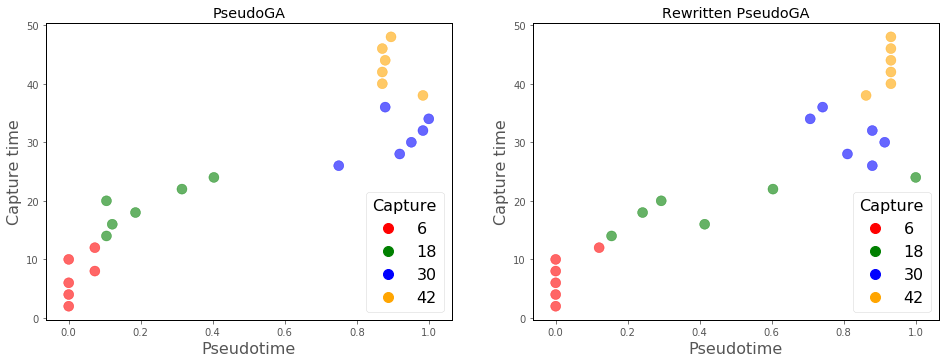

In [258]:
mdata = pd.read_csv('WindramMetaData.csv', index_col = [0])

actual_capture_time = mdata['capture.orig'].values
print(actual_capture_time)
pseudotime = list(Pseudotime)

pseudotime_pseudoGA = [.00000000, 0.00000000, 0.00000000, 0.07258065, 0.00000000, 0.07258065, 
                       0.10483871, 0.12096774, 0.18548387, 0.10483871, 
 
0.31451613, 0.40322581, 0.75000000, 0.91935484, 0.95161290, 0.98387097, 1.00000000, 0.87903226,
                       0.98387097, 0.87096774, 

0.87096774, 0.87903226, 0.87096774, 0.89516129  ]
                        #0.926829268
pseudotime_pseudoGA = list(pseudotime_pseudoGA)
fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(16, 12))
plt.subplot(2, 2, 1)
plot('PseudoGA', 'Pseudotime', 'Capture time', pseudotime_pseudoGA, actual_capture_time, mdata['capture'].values)
plt.subplot(2, 2, 2)
plot('Rewritten PseudoGA', 'Pseudotime', 'Capture time', pseudotime,actual_capture_time, mdata['capture'].values)

In [602]:

typeofCells  = [1, 1, 1, 2 ,2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5 ,6 ,6 ,
6, 6 ,6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7,
7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]


In [86]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import  numpy as np
import  pandas as pd
from collections import OrderedDict
from cycler import cycler
import warnings
warnings.filterwarnings('ignore')

matplotlib.style.use('ggplot')
matplotlib.rcParams['axes.facecolor'] = 'white'
matplotlib.rcParams['axes.edgecolor'] = 'black'
# plt.rc('axes', color_cycle=['royalblue', 'orange', 'green', 'red', 'blueviolet', 'sienna', 'hotpink', 'gray', 'y', 'c'])
# plt.rc('axes', color_cycle=['royalblue', 'green', 'sienna', 'c', 'orange', 'red', 'blueviolet', 'hotpink', 'gray', 'y'])
plt.rc('axes', prop_cycle=cycler(color=['royalblue', 'green', 'sienna', 'c', 'orange', 'red', 'blueviolet', 'hotpink', 'gray', 'y']))
# axes.prop_cycle : cycler('color', ['b', 'g', 'r', 'c', 'm', 'y', 'k'])


def plot(title, xLabel, yLabel, xData, yData, cpt, xErr=None, **kwargs):
    plt.rcParams['axes.facecolor'] = 'white'
    plt.rcParams['axes.edgecolor'] = 'black'
    # plt.figure(figsize=(8, 6))
    plt.title( '%s' % ( title ) )
    plt.xlabel('%s' % (xLabel), fontsize=16)
    plt.ylabel('%s' % (yLabel), fontsize=16)

    cellCapture = OrderedDict((('6', 'red'), ('18', 'green'), ('30', 'blue'), ('42', 'orange')))
    color_map = [0 for i in range(len(cpt))]

    for i in range(0, len(cpt)):
        if cpt[i] == 6:
            color_map[i] = 'red'
        elif cpt[i] == 18:
            color_map[i] = 'green'
        elif cpt[i] == 30:
            color_map[i] = 'blue'
        else:
            color_map[i] = 'orange'

    if 'datset' in kwargs:
        cellCapture = OrderedDict((('0', 'red'), ('2', 'green'), ('4', 'blue'), ('7', 'orange')))
        for i in range(0, len(cpt)):
            if cpt[i] == 1:
                color_map[i] = 'red'
            elif cpt[i] == 2:
                color_map[i] = 'green'
            elif cpt[i] == 3:
                color_map[i] = 'blue'
            else:
                color_map[i] = 'orange'

    # print(cellCapture)
    markers = [plt.Line2D([0, 0], [0, 0], color=color, marker='o', ms=10, linestyle='') for color in cellCapture.values()]

    plt.scatter(xData, yData, 100, c=color_map, alpha=0.6)
    if xErr is not None:
        plt.errorbar(xData, yData, xerr=xErr, fmt='none', marker='none', ecolor=color_map)

    # l = plt.legend(markers, cellCapture.keys(), numpoints=1, title='Capture', bbox_to_anchor=(1.1, 0.5), loc=10, fontsize=16)
    l = plt.legend(markers, cellCapture.keys(), numpoints=1, title='Capture', loc=4, fontsize=16)
    plt.setp(l.get_title(), fontsize=16)
    # plt.show()


In [119]:
def selection1(forCost):
    
    rowNo = forCost.shape[1]
    X1 = forCost.loc[int(rowNo/4)]
    X2 = forCost.loc[int(rowNo/4): rowNo]
    ordered_data = order(forCost)
    t_ordered_data = np.transpose(ordered_data)
    
    basis11DF = pd.DataFrame(basis11)
    expls1 = permutation(basis11DF, t_ordered_data)
    #print(expls1)
    basis1DF = pd.DataFrame(basis1)
    expls2 = permutation(basis1DF, t_ordered_data)
    basis2DF = pd.DataFrame(basis2)
    expls2 = permutation(basis2DF, t_ordered_data)
    
    forBeta = pd.concat([expls1,expls2,expls2], axis = 1)
    
    print(data_ranked.shape)
    print(forBeta.shape)
    ranked_transpose = np.transpose(data_ranked)
    beta1 = np.dot(ranked_transpose,forBeta)
    print(beta1.shape)
    
    resid11 = sumsqr_new - sqrsum_new - np.square(beta1[:,0:80])
    print(resid1.shape)
    resid22 = resid1 - np.square(beta1[:,80:160])
    print(resid1.shape)
    resid33 = resid2 - np.square(beta1[:,160:240])
    print(resid1.shape)
    
    bic1 = findBIC(resid11,1,24)
    bic2 = findBIC(resid22,2,24)
    bic3 = findBIC(resid33,3,24)
    bic1_a = np.array(bic1)
    bic2_a = np.array(bic2)
    bic3_a = np.array(bic3)
    #minBic = np.array()
    minBic = np.fmin(bic1_a,bic2_a,bic3_a)
    print(minBic)
    
    
    bicMIN = pd.DataFrame(minBic)
    cost = bicMIN.sum(axis=0)
    #costmat.loc[]
    print(type(cost))
    bicCost = order_2(cost)
    print(len(bicCost))
    bicCost[0:20]
    
    print(type(forCost))
    Individual = forCost.loc[bicCost[0:20]]
    return Individual, cost